In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Dataset Description: Restaurant Rating Prediction**

**Introduction:**
Develop a machine learning model to predict the aggregate rating of a restaurant based on various features related to the restaurant's characteristics and operations.

**Attributes:**

- **Restaurant ID:** Unique identifier for each restaurant.
- **Restaurant Name:** Name of the restaurant.
- **Country Code:** Country code where the restaurant is located.
- **City:** City where the restaurant is situated.
- **Address:** Address of the restaurant.
- **Locality:** General locality of the restaurant.
- **Locality Verbose:** Detailed locality description.
- **Longitude:** Longitude coordinate of the restaurant's location.
- **Latitude:** Latitude coordinate of the restaurant's location.
- **Cuisines:** Type of cuisines offered by the restaurant (target variable).
- **Average Cost for Two:** Average cost for two people dining at the restaurant.
- **Currency:** Currency used for pricing.
- **Has Table Booking:** Binary variable indicating if the restaurant accepts table bookings.
- **Has Online Delivery:** Binary variable indicating if the restaurant offers online delivery.
- **Is Delivering Now:** Binary variable indicating if the restaurant is currently delivering.
- **Switch to Order Menu:** Binary variable indicating if the restaurant has an online menu ordering option.
- **Price Range:** Range indicating the price level of the restaurant's menu items.
- **Aggregate Rating:** Average rating of the restaurant based on customer reviews.
- **Rating Color:** Color code representing the rating level.
- **Rating Text:** Textual representation of the rating level.
- **Votes:** Total number of votes received by the restaurant.

---

### Read the Dataset

In [2]:
df = pd.read_excel("RestaurantRating_Dataset.xlsx")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Shape of the Dataset

In [3]:
print("The Number of Rows present in the Dataset : ", df.shape[0])
print("The Number of Columns present in the Dataset : ",df.shape[1])

The Number of Rows present in the Dataset :  9551
The Number of Columns present in the Dataset :  21


### Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Descriptive Statistical Analysis

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


* Average Cost for two contains Outliers, data is Right Skewed.
* Votes feature is also Right skewed.

### Check for Duplicactes

In [6]:
print("The Number of Duplicate Rows Present : ",df.duplicated().sum())

The Number of Duplicate Rows Present :  0


### Missing Value

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
# Cuisines feature has only 9 Null Values so we can drop it.

df.dropna(axis=0,inplace=True)
df.shape

(9542, 21)

In [9]:
df['Cuisines'].isnull().sum()

0

In [10]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### Renaming Column names

In [11]:
df.rename({'Restaurant ID':'Restaurant_ID','Restaurant Name':'Restaurant_Name','Country Code':'Country_Code',
           'Locality Verbose':'Locality_Verbose','Average Cost for two':'Average_Cost_for_two',
           'Has Table booking':'Has_Table_booking','Has Online delivery':'Has_Online_delivery',
           'Is delivering now':'Is_delivering_now','Switch to order menu':'Switch_to_order_menu','Price range':'Price_range',
            'Aggregate rating':'Aggregate_rating','Rating color':'Rating_color','Rating text':'Rating_text'},axis=1,inplace=True)

In [12]:
df.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

In [13]:
df.head(1)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


#### Geting unique counts of all object datatype:

In [14]:
col = ['City','Cuisines','Country_Code','Currency','Has_Table_booking','Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Rating_color', 'Rating_text','Price_range']
for i in col:
    print(df[i].value_counts())
    print("------------------------------------------------")

City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: count, Length: 140, dtype: int64
------------------------------------------------
Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine             

* Switch_to_order_menu feature has all entry as No, so we can choose to drop this column.


In [15]:
df = df.drop(['Switch_to_order_menu'],axis=1)
df.shape

(9542, 20)

In [16]:
df['Restaurant_Name'].value_counts()

Restaurant_Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: count, Length: 7437, dtype: int64

In [17]:
# check for unique values
print("Unqiue values per column:")
df.nunique()

Unqiue values per column:


Restaurant_ID           9542
Restaurant_Name         7437
Country_Code              15
City                     140
Address                 8910
Locality                1206
Locality_Verbose        1263
Longitude               8111
Latitude                8668
Cuisines                1825
Average_Cost_for_two     140
Currency                  12
Has_Table_booking          2
Has_Online_delivery        2
Is_delivering_now          2
Price_range                4
Aggregate_rating          33
Rating_color               6
Rating_text                6
Votes                   1012
dtype: int64

### Outlier Detection

<Axes: >

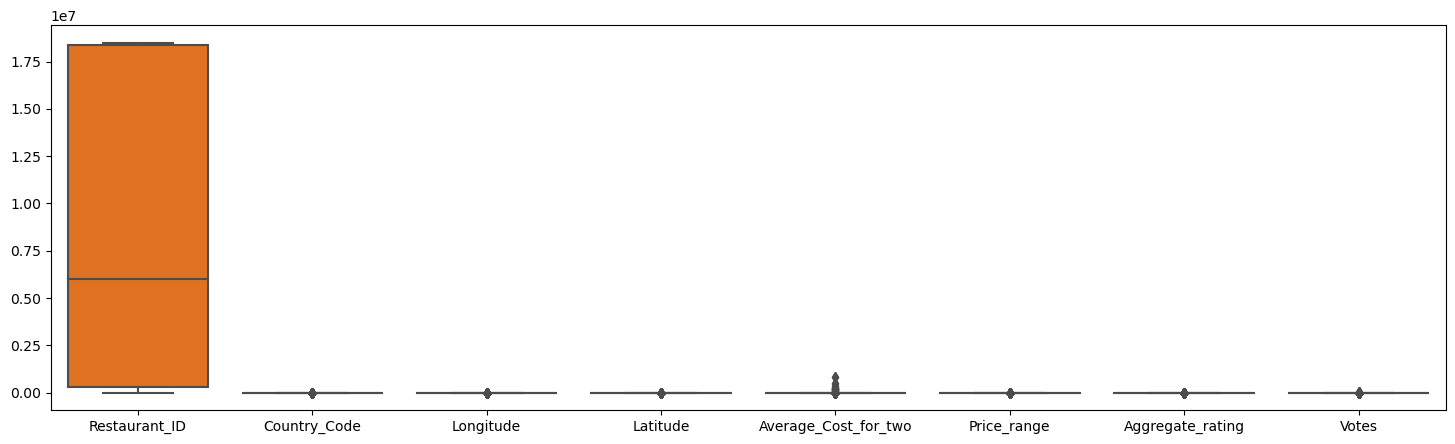

In [18]:
plt.figure(figsize=(18,5))
sns.boxplot(df,palette='gist_rainbow')

* Column Average_Cost_for_two contains some outlier.

## Exploratory Data Analysis

In [19]:
# Extracting Categorical & Continuous Columns

cat_col = []
cont_col = []
for col in df.columns:
    if(df[col].dtype == 'object'):
        cat_col.append(col)
    else:
        cont_col.append(col)

In [20]:
cat_col

['Restaurant_Name',
 'City',
 'Address',
 'Locality',
 'Locality_Verbose',
 'Cuisines',
 'Currency',
 'Has_Table_booking',
 'Has_Online_delivery',
 'Is_delivering_now',
 'Rating_color',
 'Rating_text']

In [21]:
cont_col

['Restaurant_ID',
 'Country_Code',
 'Longitude',
 'Latitude',
 'Average_Cost_for_two',
 'Price_range',
 'Aggregate_rating',
 'Votes']

In [22]:
cont_col_eda = ['Average_Cost_for_two','Price_range','Aggregate_rating','Votes']

In [23]:
# Important Categorical Column for EDA
cat_col_eda = ['Has_Table_booking','Has_Online_delivery','Is_delivering_now','Rating_color','Rating_text','Price_range']

In [24]:
df['Cuisines'].value_counts().index

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food',
       ...
       'Cafe, Pizza, Burger',
       'Healthy Food, Continental, Juices, Beverages, Italian, Salad, Lebanese',
       'Goan, American, Portuguese', 'South Indian, Desserts, Beverages',
       'Healthy Food, North Indian, Italian, Salad', 'Bengali, Fast Food',
       'North Indian, Rajasthani, Asian',
       'Chinese, Thai, Malaysian, Indonesian',
       'Bakery, Desserts, North Indian, Bengali, South Indian',
       'Italian, World Cuisine'],
      dtype='object', name='Cuisines', length=1825)

### Countplot of all Categorical Columns

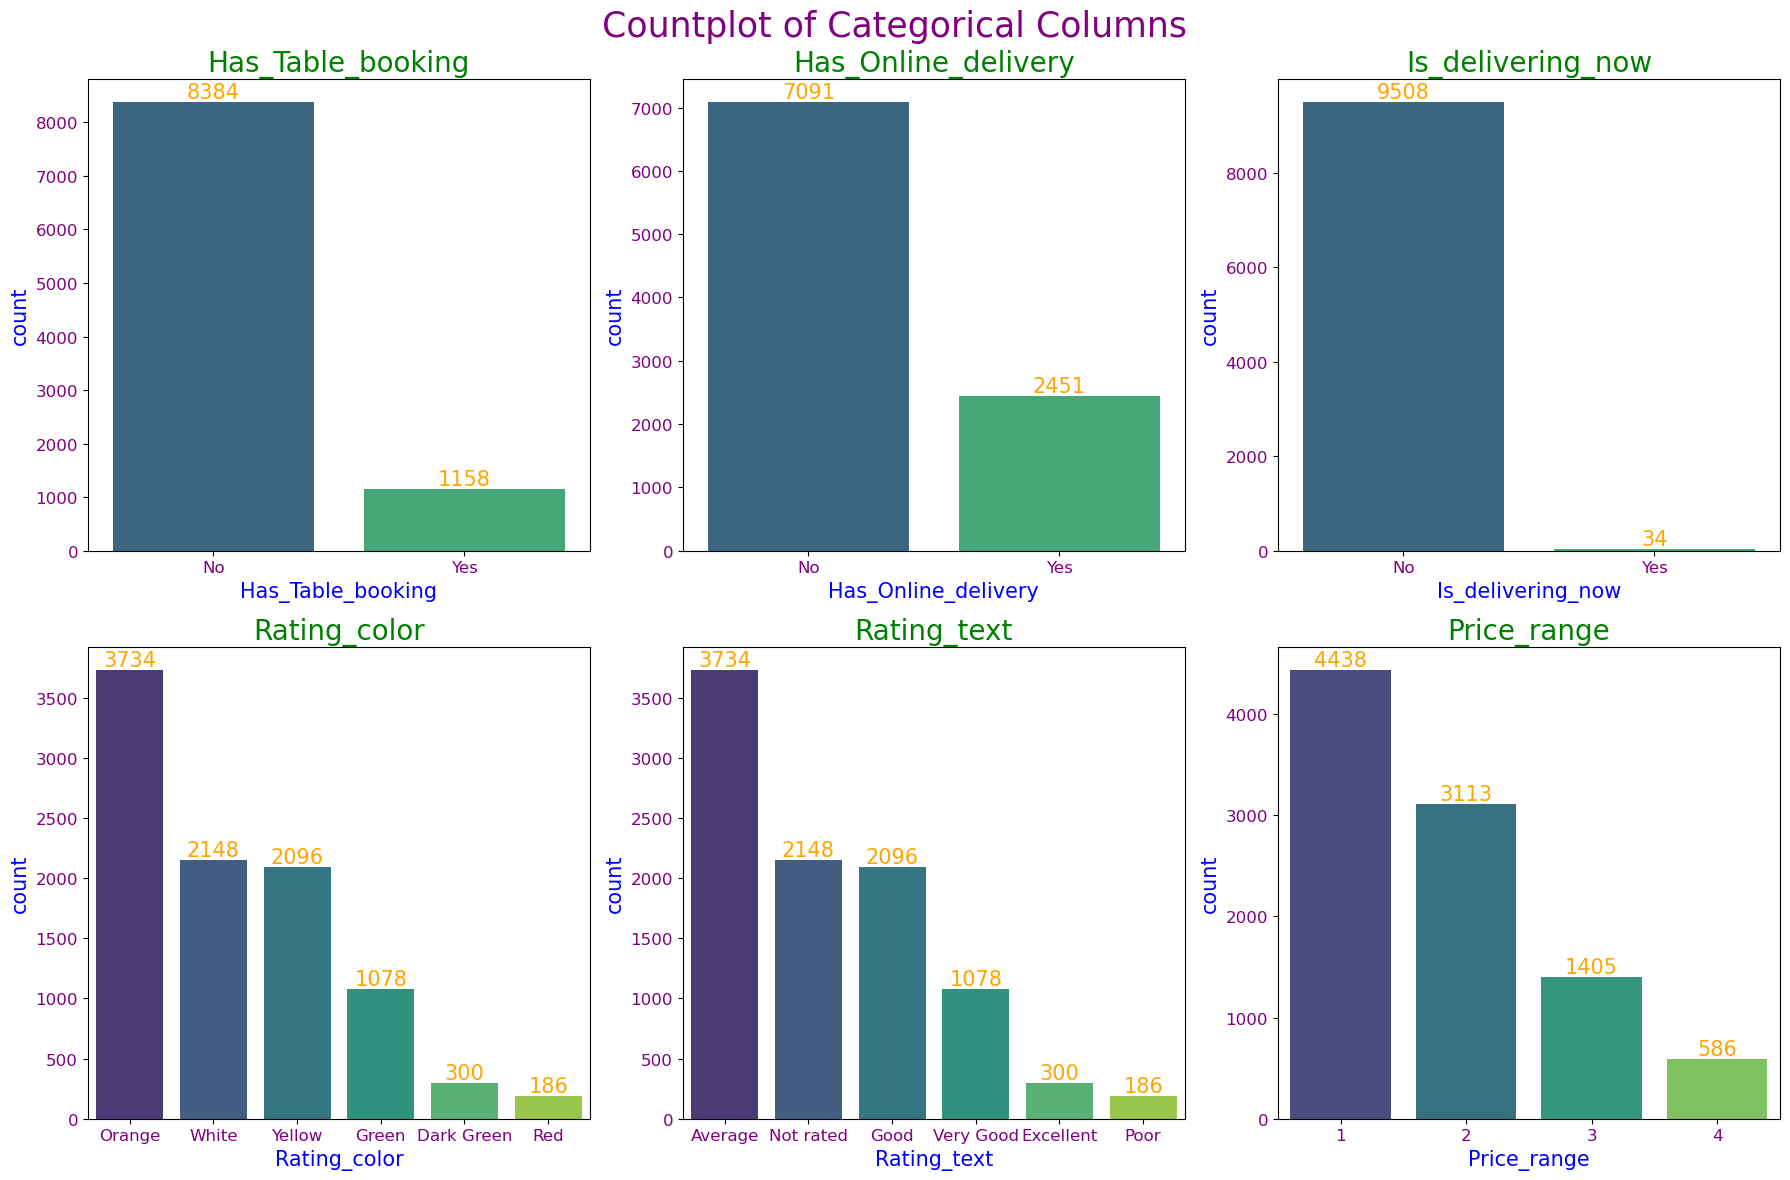

In [25]:
fig = plt.figure(figsize=(18,12))
plt.suptitle("Countplot of Categorical Columns",fontsize=25,fontweight=10,color='purple')
for i in range(0,len(cat_col_eda)):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x=df[cat_col_eda[i]], data=df, order=df[cat_col_eda[i]].value_counts().index, palette='viridis')
    for bars in ax.containers:
        ax.bar_label(bars,color='orange',fontsize=15)
        # plt.bar_label(bars, color='orange',fontsize=15)
    plt.title("{}".format(cat_col_eda[i]),color='green',fontsize=20)
    plt.xlabel(cat_col_eda[i],color='blue',fontsize=15)
    plt.ylabel("count",fontsize=15,color='blue')
    plt.xticks(color='purple',fontsize=12)
    plt.yticks(color='purple',fontsize=12);
    
fig.tight_layout() 
plt.show()

* Maximum Restaurants don't provide the facilily of Table Booking & Online Delivery.
* Maximum Restaurant have Average Rating.
* Very few Restaurants have got Excellent & Poor Ratings.

### Distribution of Continuous Columns

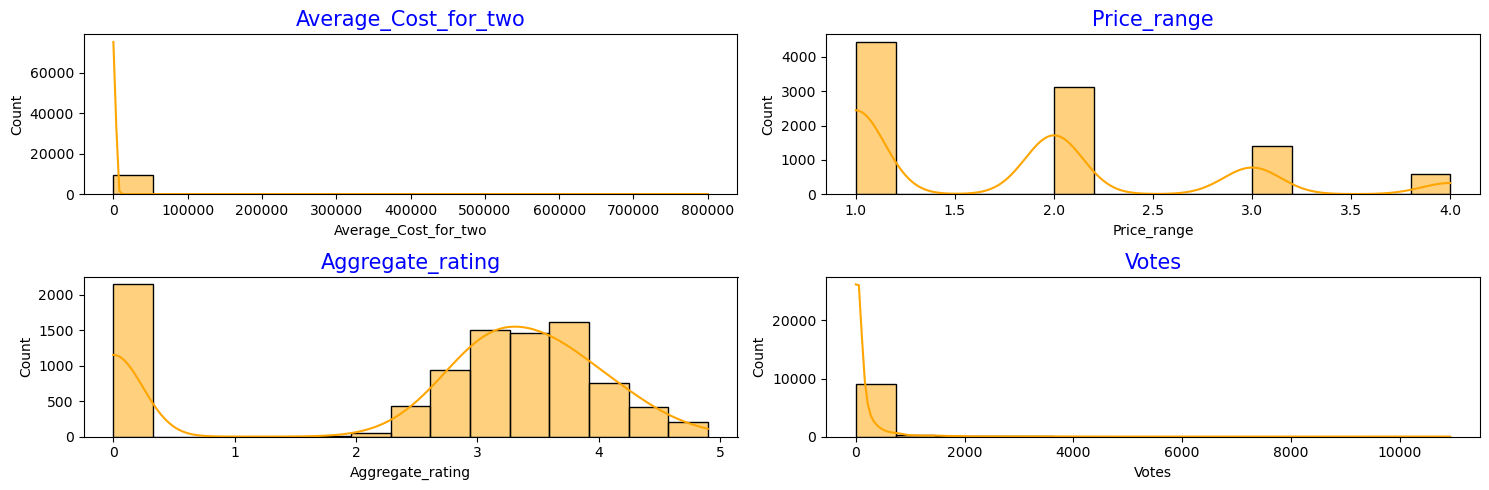

In [26]:
fig,axes = plt.subplots(2,2,figsize=(15,5))
plt.subplots_adjust(hspace=0.2)
for i,j in zip(cont_col_eda,axes.flatten()):
    axes=sns.histplot(data = df,x = i, ax=j, kde=True, bins=15,color='orange')
    axes.set_title(i,color='blue',fontsize=15)
fig.tight_layout()
plt.show()

### Boxplots

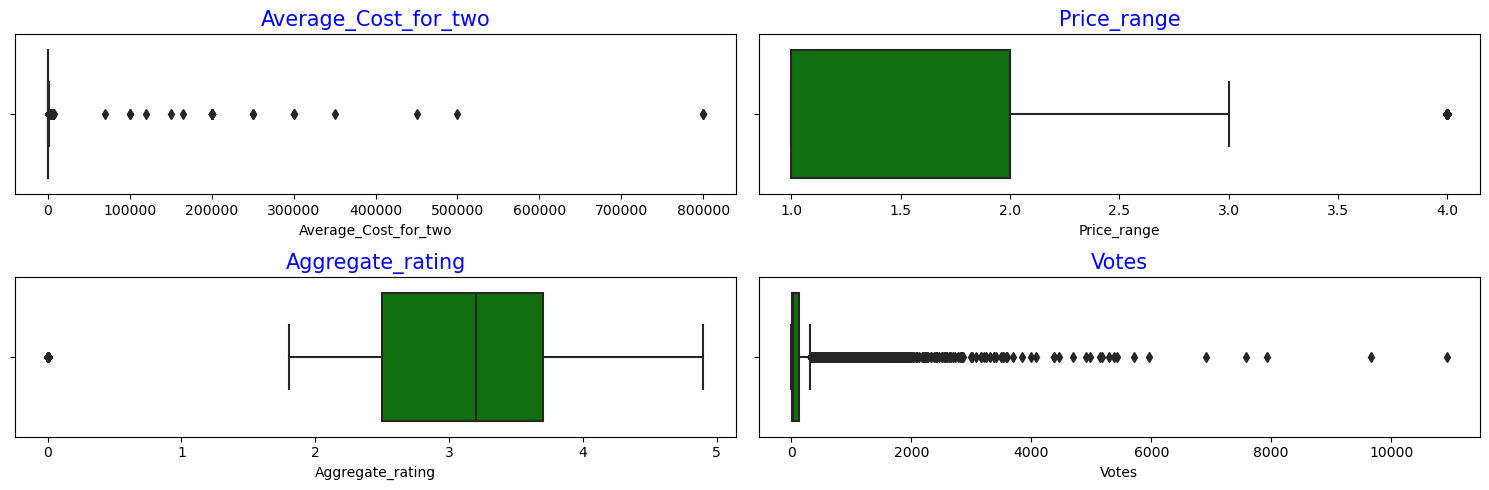

In [27]:
fig,axes = plt.subplots(2,2,figsize=(15,5))
plt.subplots_adjust(hspace=0.2)
for i,j in zip(cont_col_eda,axes.flatten()):
    axes=sns.boxplot(data = df,x = i, ax=j, color='green')
    axes.set_title(i,color='blue',fontsize=15)
fig.tight_layout()
plt.show()

In [28]:
df.groupby(['Aggregate_rating','Rating_color','Rating_text']).size().reset_index().rename(columns={0:'Rating_Count'})

,Aggregate_rating,Rating_color,Rating_text,Rating_Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [29]:
### Find the countries name that has given 0 rating 
df[df['Rating_color']=='White'].groupby('Country_Code').size().reset_index()

,Country_Code,0
0,1,2139
1,30,5
2,215,1
3,216,3


In [30]:
df[df['Rating_color']=='White'][['City','Country_Code']]

,City,Country_Code
30,Bras�_lia,30
58,Rio de Janeiro,30
69,S��o Paulo,30
77,S��o Paulo,30
78,S��o Paulo,30
...,...,...
9109,Noida,1
9110,Noida,1
9111,Noida,1
9112,Noida,1


In [31]:
df[df['Country_Code'] == 1]['City'].value_counts().head(10)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Name: count, dtype: int64

* Maximum number of 0 ratings are from Indian customers.
* Country_code 1 belongs to Indian Cities.

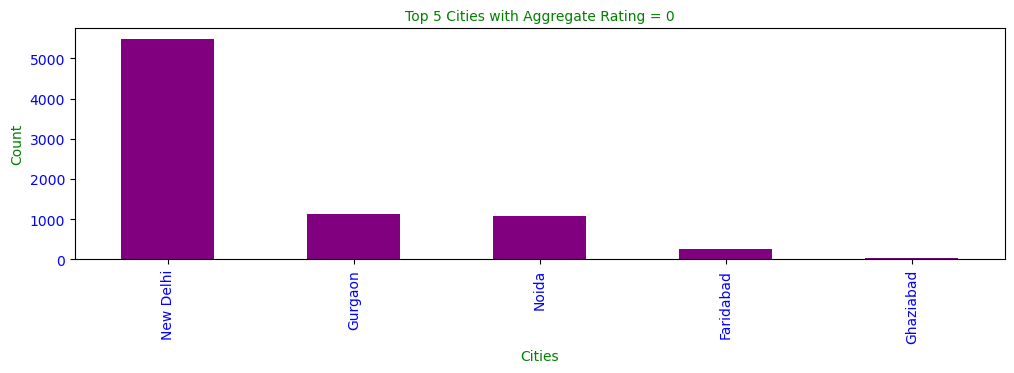

In [32]:
plt.figure(figsize=(12,3))
df[df['Country_Code'] == 1]['City'].value_counts().head().plot(kind='bar',color='purple')
plt.title("Top 5 Cities with Aggregate Rating = 0",color='green',fontsize = 10,fontweight=10)
plt.xlabel("Cities",color='green')
plt.ylabel("Count",color='green')
plt.xticks(color='blue')
plt.yticks(color='blue')
plt.show()

### Bivariate Analysis

### Removing 'Not - Rated' and having 'Aggregate Rating ==0' Restaurants

In [33]:
df[(df['Aggregate_rating']==0) & (df['Rating_text'] == 'Not rated')]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
30,6600060,Sandubas Caf��,30,Bras�_lia,"Edif�_cio Jos�� Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Bras�_lia",-47.890167,-15.797000,"Brazilian, Cafe",30,Brazilian Real(R$),No,No,No,1,0.0,White,Not rated,2
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",70,Brazilian Real(R$),No,No,No,3,0.0,White,Not rated,1
69,6710645,Cantinho da Gula,30,S��o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...",Itaim Bibi,"Itaim Bibi, S��o Paulo",-46.675667,-23.581000,Brazilian,55,Brazilian Real(R$),No,No,No,2,0.0,White,Not rated,0
77,6701419,Divino Fog��o,30,S��o Paulo,"Shopping Metr�� Santa Cruz - Piso L2, Rua Domi...","Shopping Metr�� Santa Cruz, Vila Mariana","Shopping Metr�� Santa Cruz, Vila Mariana, S��o...",-46.637167,-23.599500,"Brazilian, Mineira",65,Brazilian Real(R$),No,No,No,3,0.0,White,Not rated,2
78,6703956,Super Grill,30,S��o Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, S��o Paulo",-46.698574,-23.622925,Brazilian,50,Brazilian Real(R$),No,No,No,2,0.0,White,Not rated,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,400,Indian Rupees(Rs.),No,No,No,1,0.0,White,Not rated,1
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,600,Indian Rupees(Rs.),No,No,No,2,0.0,White,Not rated,3
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,2,0.0,White,Not rated,0
9112,18255132,The Grand,1,Noida,"G-5, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557852,"Raw Meats, Fast Food",250,Indian Rupees(Rs.),No,No,No,1,0.0,White,Not rated,1


In [34]:
df_rated = df[(df['Aggregate_rating'] !=0) & (df['Rating_text'] != 'Not rated')]

print(df_rated.shape)

(7394, 20)


In [35]:
# print(df_rated.shape)

In [36]:
df_rated.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229


### Distribution of Rating Text

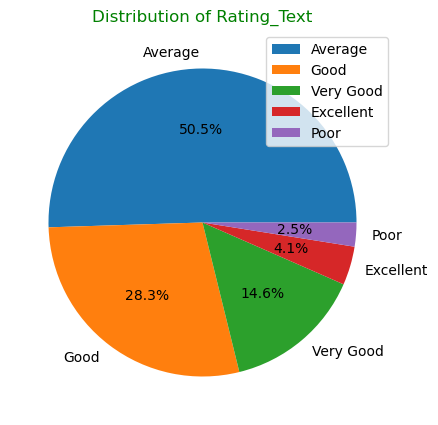

In [37]:
plt.figure(figsize=(5,5))
label = df_rated['Rating_text'].value_counts().keys()
plt.pie(data=df_rated,x=df_rated["Rating_text"].value_counts(),labels=label,autopct="%.1f%%")
plt.title("Distribution of Rating_Text",color='green')
#print("Here 5 stands for High Score and 1 for Poor Score")
plt.legend(loc='upper right')     # loc='upper left'

plt.show()

### Aggregate Rating Vs Votes

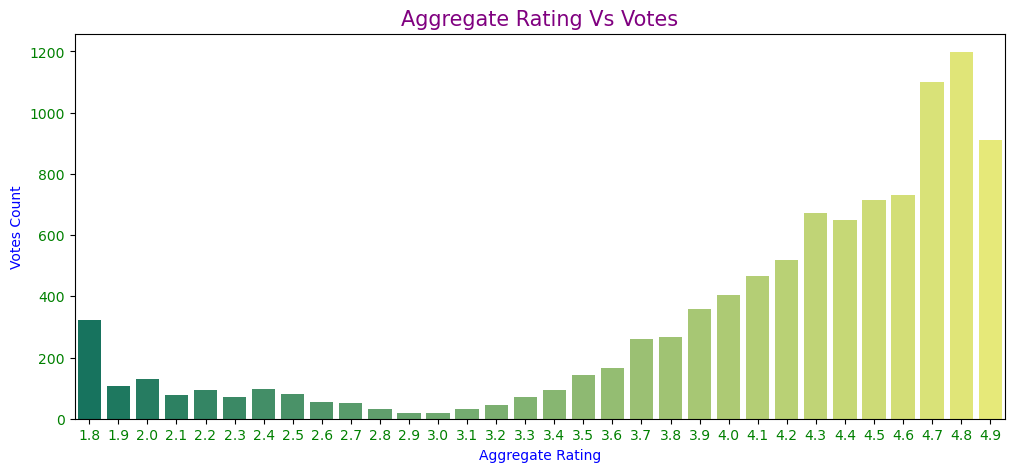

In [38]:
plt.figure(figsize=(12,5))
sns.barplot(df_rated,x='Aggregate_rating', y = 'Votes', palette='summer', errorbar=None)
plt.title("Aggregate Rating Vs Votes",color='purple',fontsize = 15,fontweight=20)
plt.xlabel("Aggregate Rating",color='blue')
plt.ylabel("Votes Count",color='blue')
plt.xticks(color='green')
plt.yticks(color='green')
plt.show()

* Votes Count is Maximum for rating 4.7 & 4.8.

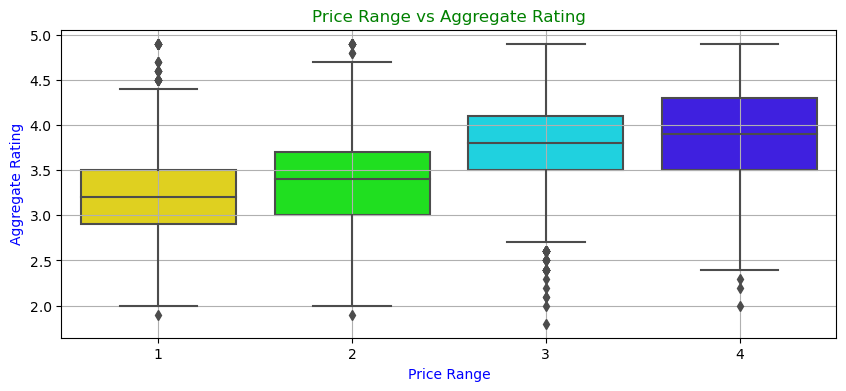

In [39]:
# Visualizing the relationship between Price range and Aggregate rating
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_rated, x='Price_range', y='Aggregate_rating',palette='gist_rainbow')
plt.title('Price Range vs Aggregate Rating',color='green')
plt.xlabel('Price Range',color='blue')
plt.ylabel('Aggregate Rating',color='blue')
plt.grid(True)
plt.show()


* For Price Range - 1 ,50% of the customers have given Aggregate Rating below 3.3 & 50% above 3.3 

### Price Range Vs Average cost for Two

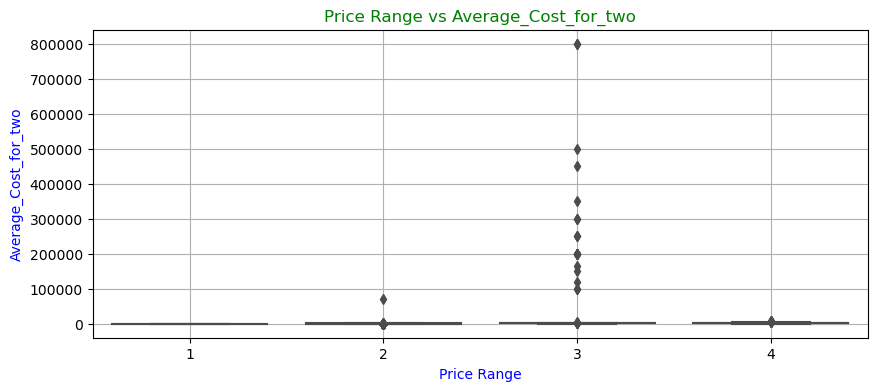

In [40]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_rated, x='Price_range', y='Average_Cost_for_two',palette='gist_rainbow')
plt.title('Price Range vs Average_Cost_for_two',color='green')
plt.xlabel('Price Range',color='blue')
plt.ylabel('Average_Cost_for_two',color='blue')
plt.grid(True)
plt.show()


* For Price Range 1 Avg cost for two is eqaul to zero.
* For Price range 3 Avg cost for two varies a lot and its above rs 1 lakh to 8 lakhs which seems very high.

### Let's Explore Restaurants by their Price Range & Average Cost for Two

### Restaurants that comes under Price Range == 3 (Most Expensive Restaurants)

In [41]:
#df_rated.groupby(['Restaurant_Name'])[df_rated['Price_range'==3]]
df_rated[df_rated['Price_range'] == 3][['Restaurant_Name','City','Aggregate_rating','Rating_text','Cuisines','Average_Cost_for_two','Votes']].sort_values(by='Average_Cost_for_two',ascending=False)

,Restaurant_Name,City,Aggregate_rating,Rating_text,Cuisines,Average_Cost_for_two,Votes
9283,Skye,Jakarta,4.1,Very Good,"Italian, Continental",800000,1498
9284,Satoo - Hotel Shangri-La,Jakarta,4.6,Excellent,"Asian, Indonesian, Western",800000,873
9287,Sushi Masa,Jakarta,4.9,Excellent,"Sushi, Japanese",500000,605
9289,3 Wise Monkeys,Jakarta,4.2,Very Good,Japanese,450000,395
9294,Avec Moi Restaurant and Bar,Jakarta,4.3,Very Good,"French, Western",350000,243
...,...,...,...,...,...,...,...
399,Butterburrs,Pocatello,3.6,Good,"American, Breakfast",30,121
9358,La Favorita,Edinburgh,4.5,Excellent,Italian,30,329
9357,Loudons Cafe & Bakery,Edinburgh,3.9,Good,"Cafe, Bakery",30,63
467,Makansutra Gluttons Bay,Singapore,3.0,Average,"Singaporean, Chinese, Seafood, Malay, Indian",30,25


* Most Expensive Top 5 Restaurants belongs to city Jakarta with ratings as 'Very Good', 'Excellent' and Avg cost for two          ranging between 350000 to 800000.
* Minimum cost for Average cost for two is rs 30.

* Also some restaurants have Avg cost for two as rs 30.

### Restaurants that comes under Price Range == 2

In [42]:
df_rated[df_rated['Price_range'] == 2][['Restaurant_Name','City','Aggregate_rating','Rating_text','Cuisines','Average_Cost_for_two','Votes']].sort_values(by='Average_Cost_for_two',ascending=False)

,Restaurant_Name,City,Aggregate_rating,Rating_text,Cuisines,Average_Cost_for_two,Votes
9277,Momo Milk,Bogor,3.7,Good,"Cafe, Desserts, Beverages",70000,783
9498,Elite Indian Restaurant,Colombo,2.4,Poor,"North Indian, Chinese, Sri Lankan",1800,240
9503,Malay Restaurant,Colombo,3.5,Good,"Malaysian, North Indian, Sri Lankan",1500,80
9505,Simply Strawberries By Jagro,Colombo,4.5,Excellent,"Juices, Desserts",1300,146
9516,Burger's King,Colombo,4.1,Very Good,Fast Food,1000,199
...,...,...,...,...,...,...,...
517,Pig and Whistle,Trentham East,4.1,Very Good,Australian,20,87
393,Mad Cowes Cafe,Phillip Island,3.7,Good,"Breakfast, Coffee and Tea, Modern Australian",20,351
539,Anchorage Cafe Restaurant Wine Bar,Victor Harbor,3.6,Good,"Coffee and Tea, Tapas, Australian",20,96
102,Whitebull Hotel,Armidale,3.5,Good,"Bar Food, Steak",20,25


* for Restaurants with Price Range as 2, maximum Average cost for two is rs 70000 and minimum is 15 rs and the ratings are varied like               'good','Poor','Excellent','very good'.

### Restaurants that comes under Price Range == 1

In [43]:
df_rated[df_rated['Price_range'] == 1][['Restaurant_Name','City','Aggregate_rating','Rating_text','Cuisines','Average_Cost_for_two','Votes']].sort_values(by='Average_Cost_for_two',ascending=False)

,Restaurant_Name,City,Aggregate_rating,Rating_text,Cuisines,Average_Cost_for_two,Votes
3285,Grain Bell Restaurant,New Delhi,2.8,Average,"North Indian, Chinese",450,81
6974,Cafe Coffee Day,New Delhi,3.3,Average,Cafe,450,78
2776,Arabian Nites,New Delhi,3.5,Good,Lebanese,450,239
913,Momo-Cha,Faridabad,2.8,Average,"North Indian, Chinese",450,20
4626,Cafe Coffee Day,New Delhi,2.3,Poor,Cafe,450,32
...,...,...,...,...,...,...,...
2368,UrbanCrave,Kanpur,3.9,Good,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,127
277,Happy Joe's Pizza & Ice Cream,Dubuque,3.5,Good,"Desserts, Pizza, Ice Cream",0,74
201,Deorio's,Columbus,4.0,Very Good,"Italian, Pizza",0,170
397,Royal Hotel,Pocatello,3.6,Good,"Pizza, Bar Food",0,59


* Here average cost for two ranges between 0 to 450.

### Restaurants that comes under Price Range == 4

In [44]:
df_rated[df_rated['Price_range'] == 4][['Restaurant_Name','City','Aggregate_rating','Rating_text','Cuisines','Average_Cost_for_two','Votes']].sort_values(by='Average_Cost_for_two',ascending=False)

,Restaurant_Name,City,Aggregate_rating,Rating_text,Cuisines,Average_Cost_for_two,Votes
7543,Orient Express - Taj Palace Hotel,New Delhi,4.0,Very Good,European,8000,145
4088,Tian - Asian Cuisine Studio - ITC Maurya,New Delhi,4.1,Very Good,"Asian, Japanese, Korean, Thai, Chinese",7000,188
4087,Bukhara - ITC Maurya,New Delhi,4.4,Very Good,North Indian,6500,2826
7499,The Spice Route - The Imperial,New Delhi,4.0,Very Good,"Malaysian, Thai, Kerala, Vietnamese, Sri Lankan",6000,259
7494,1911 - The Imperial,New Delhi,3.9,Good,"North Indian, Chinese, South Indian, Italian",6000,272
...,...,...,...,...,...,...,...
360,Seasons 52 Fresh Grill,Orlando,4.4,Very Good,American,60,1685
9376,Steak,Edinburgh,4.2,Very Good,"Steak, Scottish, British",55,64
353,Raglan Road Irish Pub and Restaurant,Orlando,4.3,Very Good,Irish,50,782
357,Maggiano's Little Italy,Orlando,4.4,Very Good,Italian,50,886


### Restaurants with Average Cost for Two == 0.

In [45]:
df_rated[df_rated['Average_Cost_for_two'] == 0][['Restaurant_Name','City','Aggregate_rating','Rating_text','Cuisines','Price_range','Votes']]

,Restaurant_Name,City,Aggregate_rating,Rating_text,Cuisines,Price_range,Votes
85,El Vaquero Mexican Restaurant,Albany,3.4,Average,Mexican,1,45
201,Deorio's,Columbus,4.0,Very Good,"Italian, Pizza",1,170
240,Azteca,Davenport,4.3,Very Good,Mexican,1,167
277,Happy Joe's Pizza & Ice Cream,Dubuque,3.5,Good,"Desserts, Pizza, Ice Cream",1,74
397,Royal Hotel,Pocatello,3.6,Good,"Pizza, Bar Food",1,59
407,Senor Iguanas,Pocatello,3.6,Good,Mexican,1,108
634,The Latitude - Radisson Blu,Agra,3.9,Good,"North Indian, Chinese, Continental",1,103
637,Sheroes Hangout,Agra,4.9,Excellent,"Cafe, North Indian, Chinese",1,77
639,Chapter 1 Cafe,Agra,3.9,Good,"Cafe, Italian, Mexican, North Indian, Continental",1,98
677,The BrewMaster,Allahabad,3.3,Average,"North Indian, Chinese, Italian",1,49


* Restaurants that have Average cost for two equal to zero (0) have got very good Ratings i.e Ratings > 3.3 to 4.9 and all       these Restaurants comes under Price range = 1.

### Top 10 Cuisines

In [46]:
df_rated.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

Cuisines
North Indian, Mughlai                                               53703
North Indian                                                        45894
North Indian, Chinese                                               41912
Cafe                                                                30610
Chinese                                                             21836
                                                                    ...  
North Indian, Fast Food, Chinese, Continental                           4
South Indian, North Indian, Street Food                                 4
Chinese, Fast Food, Bakery                                              4
North Indian, Fast Food, Afghani                                        4
Mithai, North Indian, Street Food, Chinese, South Indian, Indian        4
Name: Votes, Length: 1715, dtype: int64

<Axes: xlabel='Cuisines'>

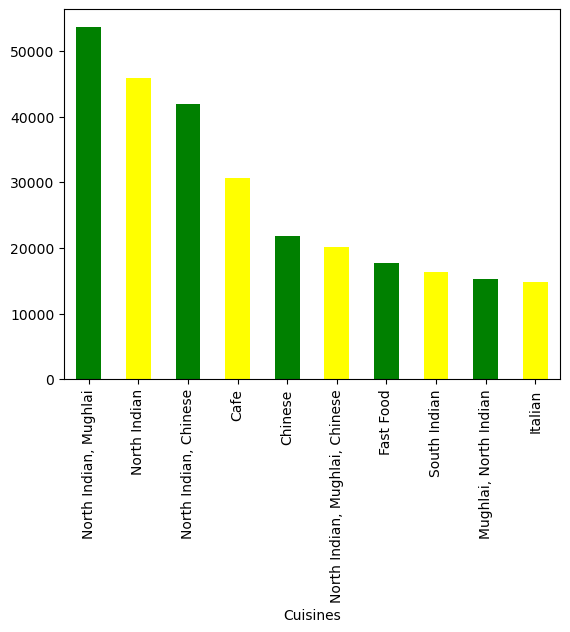

In [47]:
top_10 = df_rated.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
top_10
top_10.plot.bar(color=['green','yellow'])

#### Let's Visualize

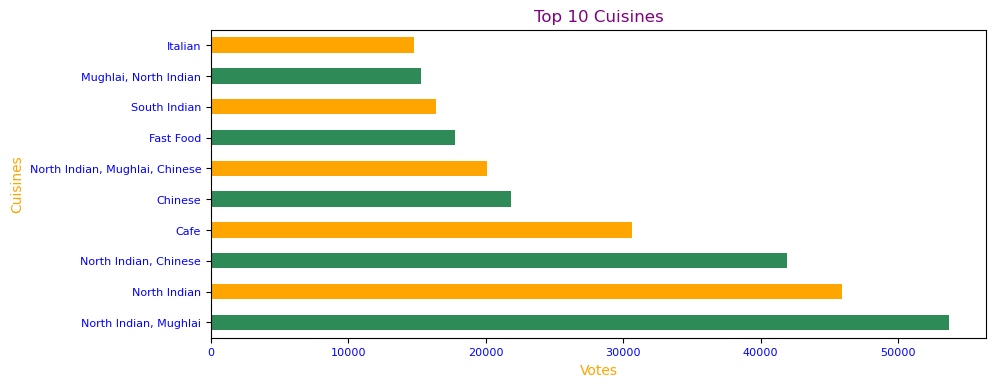

In [48]:
plt.figure(figsize=(10,4))
df_rated.groupby('Cuisines')['Votes'].sum().sort_values(ascending = False).head(10).plot(kind='barh',color=['seagreen','orange'])
#plt.barh(orde,width=0.8)
plt.title("Top 10 Cuisines",color='purple')
plt.ylabel("Cuisines",color='orange')
plt.xlabel("Votes",color='orange')
plt.xticks(color='blue',fontsize=8)
plt.yticks(color='blue',fontsize=8);
plt.show()

### Top 10 Restaurants  based on Aggregate Ratings

In [49]:
df_rated.head(1)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314


In [50]:
df_rated.groupby(['Restaurant_Name','City'])['Aggregate_rating'].count().sort_values(ascending = False).head(10)

Restaurant_Name   City     
Domino's Pizza    New Delhi    52
Cafe Coffee Day   New Delhi    49
Subway            New Delhi    38
McDonald's        New Delhi    33
Green Chick Chop  New Delhi    32
Keventers         New Delhi    21
Giani             New Delhi    20
Giani's           New Delhi    15
Sagar Ratna       New Delhi    13
Wah Ji Wah        New Delhi    13
Name: Aggregate_rating, dtype: int64

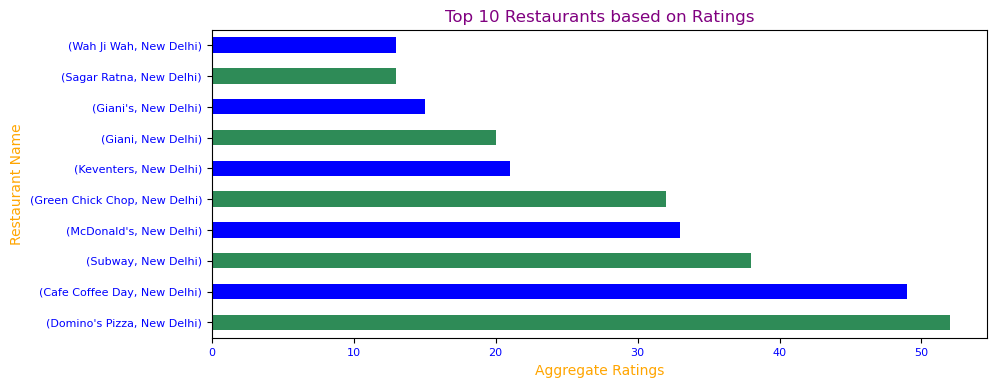

In [51]:
plt.figure(figsize=(10,4))
df_rated.groupby(['Restaurant_Name','City'])['Aggregate_rating'].count().sort_values(ascending = False).head(10).plot(kind='barh',color=['seagreen','blue'])
#plt.barh(orde,width=0.8)
plt.title("Top 10 Restaurants based on Ratings",color='purple')
plt.ylabel("Restaurant Name",color='orange')
plt.xlabel("Aggregate Ratings",color='orange')
plt.xticks(color='blue',fontsize=8)
plt.yticks(color='blue',fontsize=8);
plt.show()

### Top 10 Restaurants  based on Votes

In [52]:
df_rated.groupby(['Restaurant_Name','City'])['Votes'].sum().sort_values(ascending = False).head(10)

Restaurant_Name            City     
Toit                       Bangalore    10934
Big Chill                  New Delhi    10853
Truffles                   Bangalore     9667
Hauz Khas Social           New Delhi     7931
Joey's Pizza               Mumbai        7807
Barbeque Nation            Kolkata       7719
Peter Cat                  Kolkata       7574
Big Yellow Door            New Delhi     7511
Saravana Bhavan            New Delhi     7238
AB's - Absolute Barbecues  Bangalore     6907
Name: Votes, dtype: int64

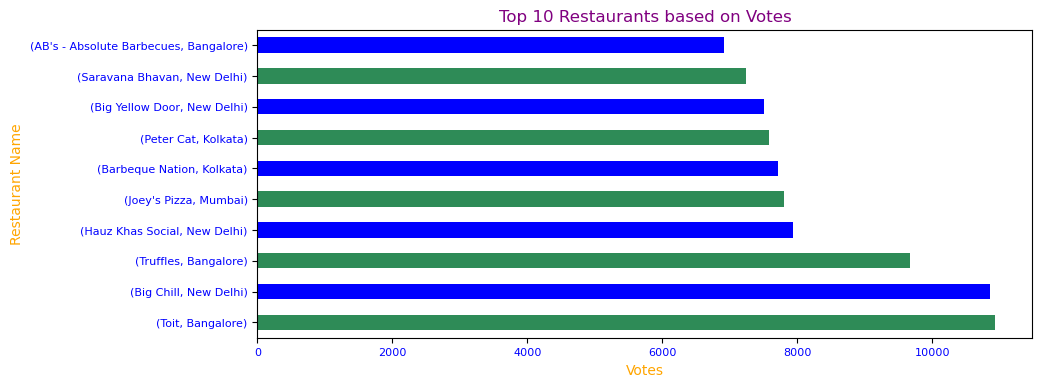

In [53]:
plt.figure(figsize=(10,4))
df_rated.groupby(['Restaurant_Name','City'])['Votes'].sum().sort_values(ascending = False).head(10).plot(kind='barh',color=['seagreen','blue'])
#plt.barh(orde,width=0.8)
plt.title("Top 10 Restaurants based on Votes",color='purple')
plt.ylabel("Restaurant Name",color='orange')
plt.xlabel("Votes",color='orange')
plt.xticks(color='blue',fontsize=8)
plt.yticks(color='blue',fontsize=8);
plt.show()

### Calculate Average cost by City

In [54]:
df_rated.groupby(['City'])['Average_Cost_for_two'].mean().sort_values(ascending = False).head(10)

City
Jakarta             308437.500000
Tangerang           250000.000000
Bogor               160000.000000
Bandung             150000.000000
Pasay City            3333.333333
Colombo               2375.000000
Mandaluyong City      2000.000000
Panchkula             2000.000000
Taguig City           1725.000000
Hyderabad             1361.111111
Name: Average_Cost_for_two, dtype: float64

* City Jakarta has very expensive restaurants followed by Tangerang, Bogor, Bandung & Pasay City.


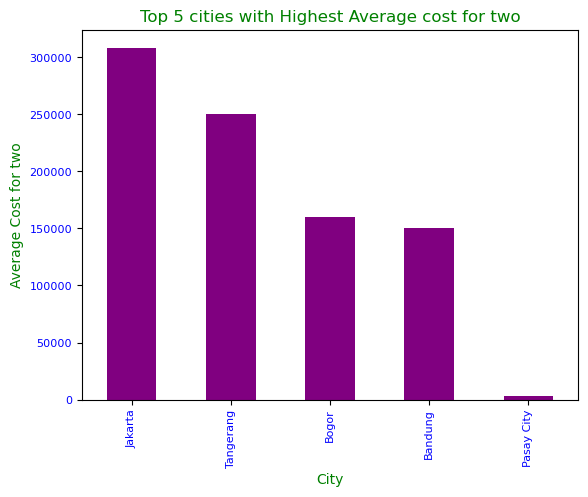

In [55]:
#Group by city and calculate average price
df_rated.groupby('City')['Average_Cost_for_two'].mean().sort_values(ascending=False).head().plot(kind='bar',color='purple')
plt.title('Top 5 cities with Highest Average cost for two',color='green')
plt.xlabel('City',color='green')
plt.ylabel('Average Cost for two',color='green')
plt.xticks(color='blue',fontsize=8)
plt.yticks(color='blue',fontsize=8);
plt.show()

### The most expensive Restaurant

In [56]:
df_rated['Average_Cost_for_two'].max()

800000

In [57]:
df_rated['Average_Cost_for_two'].idxmax()

9283

In [58]:
df_rated[df_rated['Average_Cost_for_two'] == 800000]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
9283,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,No,3,4.1,Green,Very Good,1498
9284,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,No,3,4.6,Dark Green,Excellent,873


In [59]:
df_rated.loc[9283]

Restaurant_ID                                                     7402935
Restaurant_Name                                                      Skye
Country_Code                                                           94
City                                                              Jakarta
Address                 Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...
Locality                                    Grand Indonesia Mall, Thamrin
Locality_Verbose                   Grand Indonesia Mall, Thamrin, Jakarta
Longitude                                                      106.821999
Latitude                                                        -6.196778
Cuisines                                             Italian, Continental
Average_Cost_for_two                                               800000
Currency                                           Indonesian Rupiah(IDR)
Has_Table_booking                                                      No
Has_Online_delivery                   

### Restaurant having Average cost for two -- 0

In [60]:
df_rated[df_rated['Average_Cost_for_two'] ==0]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
85,17284302,El Vaquero Mexican Restaurant,216,Albany,"2700 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.219400,31.615800,Mexican,0,Dollar($),No,No,No,1,3.4,Orange,Average,45
201,17330155,Deorio's,216,Columbus,"3201 Macon Rd Ste 167, Columbus, GA 31906",Columbus,"Columbus, Columbus",-84.942700,32.481000,"Italian, Pizza",0,Dollar($),No,No,No,1,4.0,Green,Very Good,170
240,17334679,Azteca,216,Davenport,"4811 N Brady St Ste 3, Davenport, IA 52806",Davenport,"Davenport, Davenport",-90.568300,41.569900,Mexican,0,Dollar($),No,No,No,1,4.3,Green,Very Good,167
277,17342548,Happy Joe's Pizza & Ice Cream,216,Dubuque,"855 Century Dr, Dubuque, IA 52002",Dubuque,"Dubuque, Dubuque",-90.726400,42.495500,"Desserts, Pizza, Ice Cream",0,Dollar($),No,No,No,1,3.5,Yellow,Good,74
397,17582499,Royal Hotel,216,Pocatello,"11 E Main St, Lava Hot Springs, ID 83246",Lava Hot Springs,"Lava Hot Springs, Pocatello",-112.012700,42.619200,"Pizza, Bar Food",0,Dollar($),No,No,No,1,3.6,Yellow,Good,59
407,17582627,Senor Iguanas,216,Pocatello,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,"Pocatello, Pocatello",-112.443300,42.894200,Mexican,0,Dollar($),No,No,No,1,3.6,Yellow,Good,108
634,3400073,The Latitude - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,No,1,3.9,Yellow,Good,103
637,3400346,Sheroes Hangout,1,Agra,"Opposite The Gateway Hotel, Fatehabad Road, Ta...",Tajganj,"Tajganj, Agra",78.040165,27.161850,"Cafe, North Indian, Chinese",0,Indian Rupees(Rs.),No,No,No,1,4.9,Dark Green,Excellent,77
639,3400391,Chapter 1 Cafe,1,Agra,"1374 K/1375 K, 2nd floor, Dinesh Nagar, Fatehb...",Tajganj,"Tajganj, Agra",0.000000,0.000000,"Cafe, Italian, Mexican, North Indian, Continental",0,Indian Rupees(Rs.),No,No,No,1,3.9,Yellow,Good,98
677,18317988,The BrewMaster,1,Allahabad,"Near Vishal Megamart, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",81.832796,25.451646,"North Indian, Chinese, Italian",0,Indian Rupees(Rs.),No,No,No,1,3.3,Orange,Average,49


In [61]:
df_rated.head(1)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314


In [62]:
df_rated.groupby(['Rating_text','Has_Table_booking','Has_Online_delivery','Is_delivering_now'])['Votes'].count()

Rating_text  Has_Table_booking  Has_Online_delivery  Is_delivering_now
Average      No                 No                   No                   2365
                                Yes                  No                    956
                                                     Yes                    19
             Yes                No                   No                    264
                                Yes                  No                    129
                                                     Yes                     1
Excellent    No                 No                   No                    229
                                Yes                  No                     25
                                                     Yes                     1
             Yes                No                   No                     32
                                Yes                  No                     13
Good         No                 No                   No     

In [63]:
df_rated[df_rated['Votes'] == 0]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes


In [64]:
df_rated['Price_range'].value_counts()

Price_range
1    2738
2    2711
3    1370
4     575
Name: count, dtype: int64

In [65]:
df_rated.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).reset_index()


,Cuisines,Votes
0,"North Indian, Mughlai",53703
1,North Indian,45894
2,"North Indian, Chinese",41912
3,Cafe,30610
4,Chinese,21836
...,...,...
1710,"North Indian, Fast Food, Chinese, Continental",4
1711,"South Indian, North Indian, Street Food",4
1712,"Chinese, Fast Food, Bakery",4
1713,"North Indian, Fast Food, Afghani",4


### pairplot

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


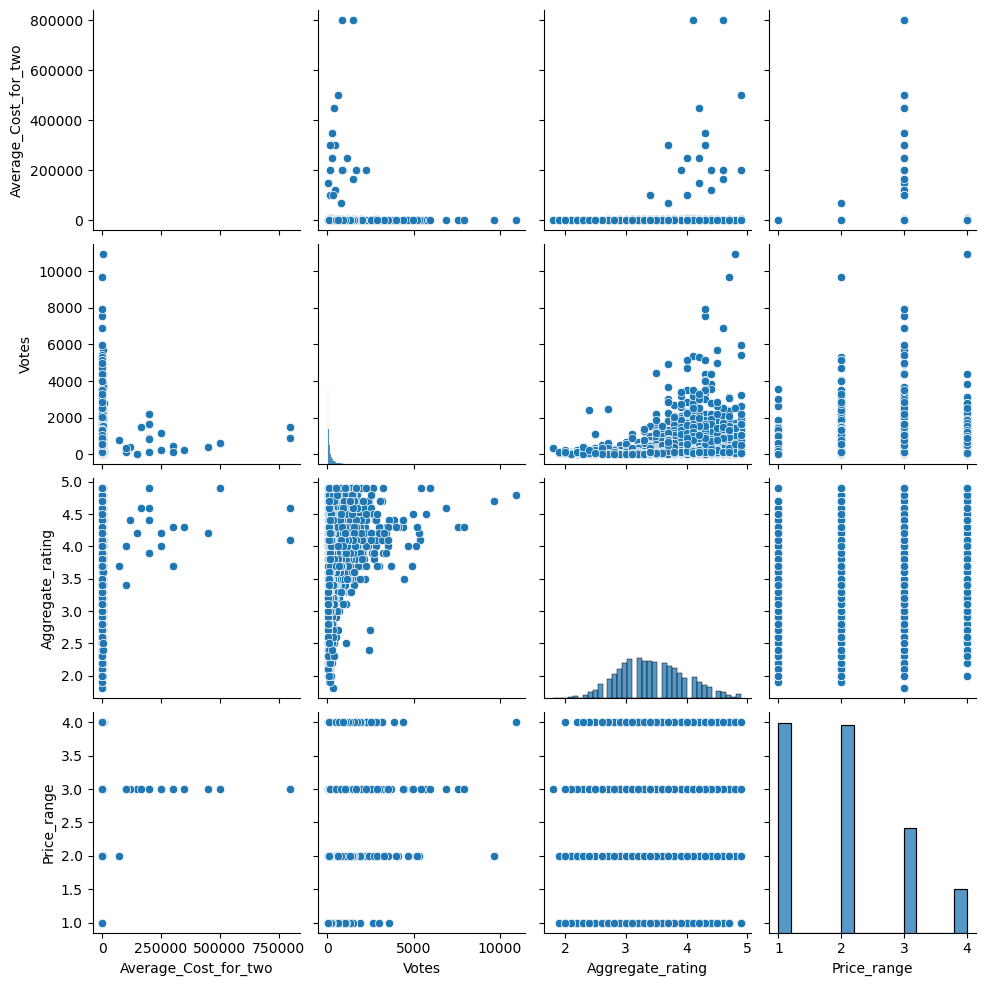

In [66]:
sns.pairplot(data=df_rated[["Average_Cost_for_two", "Votes", "Aggregate_rating",'Price_range']])

### Correlation Heatmap

<Axes: >

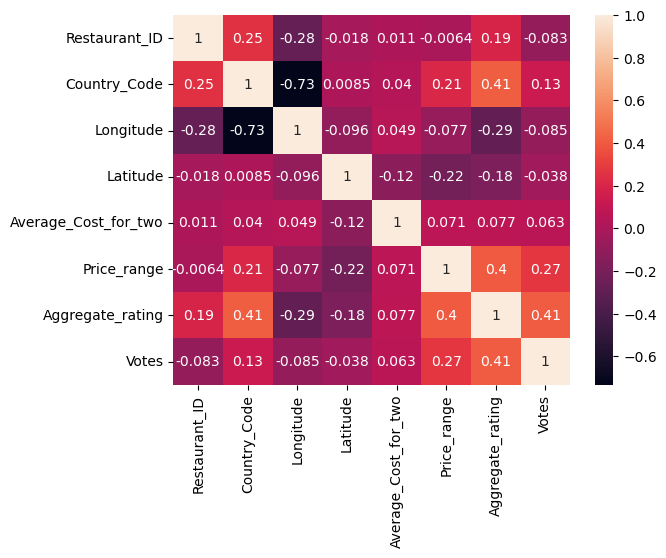

In [67]:
sns.heatmap(df_rated.corr(numeric_only=True),annot=True)

In [68]:
df_rated[['Aggregate_rating','Rating_text']].sort_values(by='Aggregate_rating',ascending=False)

,Aggregate_rating,Rating_text
637,4.9,Excellent
590,4.9,Excellent
2301,4.9,Excellent
2409,4.9,Excellent
39,4.9,Excellent
...,...,...
7706,2.0,Poor
5197,2.0,Poor
4224,1.9,Poor
7507,1.9,Poor


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


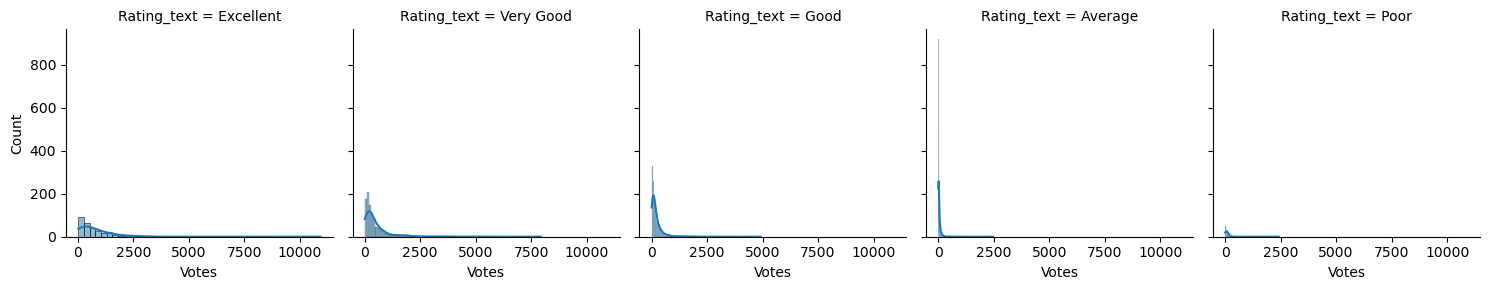

In [69]:
g = sns.FacetGrid(df_rated, col="Rating_text",palette='gist_rainbow')
g.map(sns.histplot, "Votes",kde=True);
g.tight_layout()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


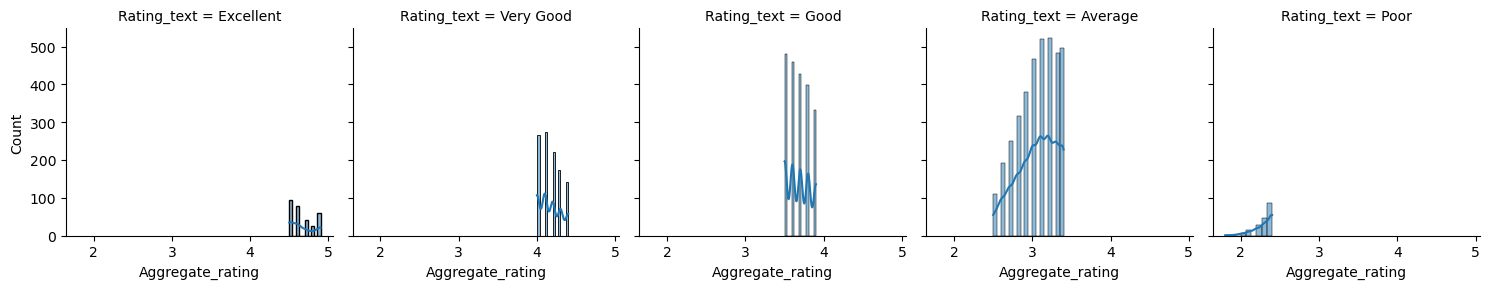

In [70]:
g = sns.FacetGrid(df_rated, col="Rating_text",palette='gist_rainbow')
g.map(sns.histplot, "Aggregate_rating",kde=True);
g.tight_layout()

* Rating greater than 4.5 = Excellent
* Rating between 4 & 4.5 = Very Good
* Rating between 3.5 & 4 = Good
* Rating between 2.5 & 3.5 = Average
* Rating below 2.5 = Poor

* Maximum Restaurants have got the Ratings as Average & Good.
* Very few Restaurants have got Exvellent and Poor Ratings.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


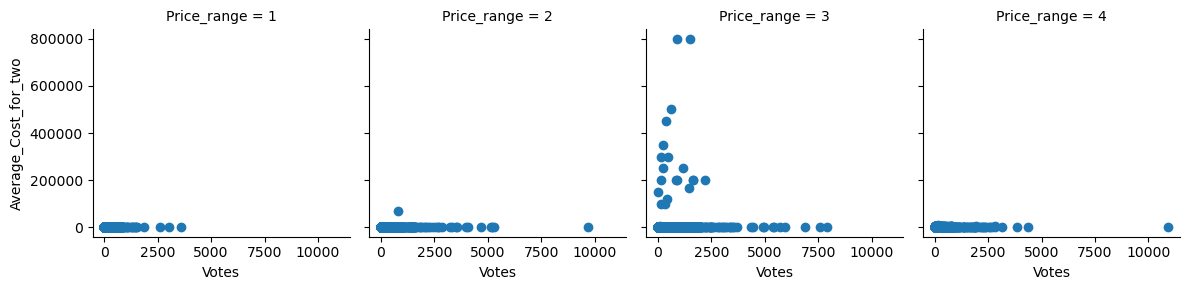

In [71]:
g = sns.FacetGrid(df_rated, col="Price_range", height=3)
g = g.map(plt.scatter, "Votes", 'Average_Cost_for_two')

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


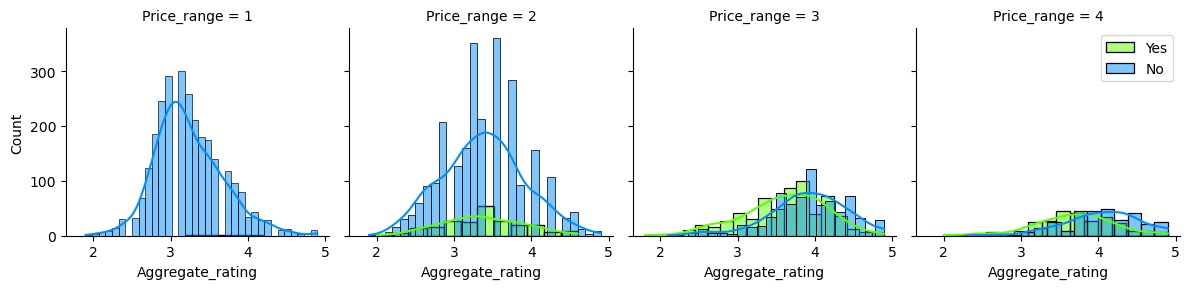

In [72]:
g = sns.FacetGrid(df_rated, col="Price_range",hue='Has_Table_booking',palette='gist_rainbow')
g.map(sns.histplot, "Aggregate_rating",kde=True);
plt.legend()
#plt.title("Male Customers")
g.tight_layout()

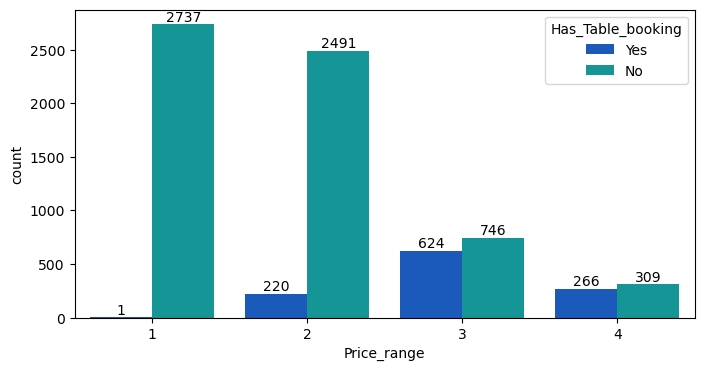

In [73]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='Price_range',data=df_rated,hue='Has_Table_booking',palette='winter')
for bars in ax.containers:
    ax.bar_label(bars)

* For Price Range == 1, There is only 1 table booking.

In [74]:
df_rated.groupby(['Aggregate_rating'])['Average_Cost_for_two'].sum().sort_values(ascending = False)

Aggregate_rating
4.6    1205500
4.9    1148840
4.2    1030760
4.1    1005455
4.3     770945
3.7     693386
4.0     600225
3.9     506265
4.4     429520
3.4     410470
3.5     348610
3.6     328607
3.8     317094
3.2     300215
3.3     293985
3.1     254525
3.0     221700
2.9     171620
2.8     151260
2.7     136700
2.6     114920
2.5      68450
2.4      58370
4.5      51515
2.3      26600
4.7      25080
4.8      18175
2.2      16175
2.1       9500
2.0       6250
1.8       1000
1.9        750
Name: Average_Cost_for_two, dtype: int64

In [75]:
df.groupby(['Price_range'])['Average_Cost_for_two'].count()

Price_range
1    4438
2    3113
3    1405
4     586
Name: Average_Cost_for_two, dtype: int64

### Top rated restaurant

In [76]:
df_rated['Votes'].max()

10934

In [77]:
df_rated['Votes'].idxmax()

728

In [78]:
df_rated[df_rated['Votes'] == 10934]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
728,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",2000,Indian Rupees(Rs.),No,No,No,4,4.8,Dark Green,Excellent,10934


### Service offered by restaurants

<Figure size 800x300 with 0 Axes>

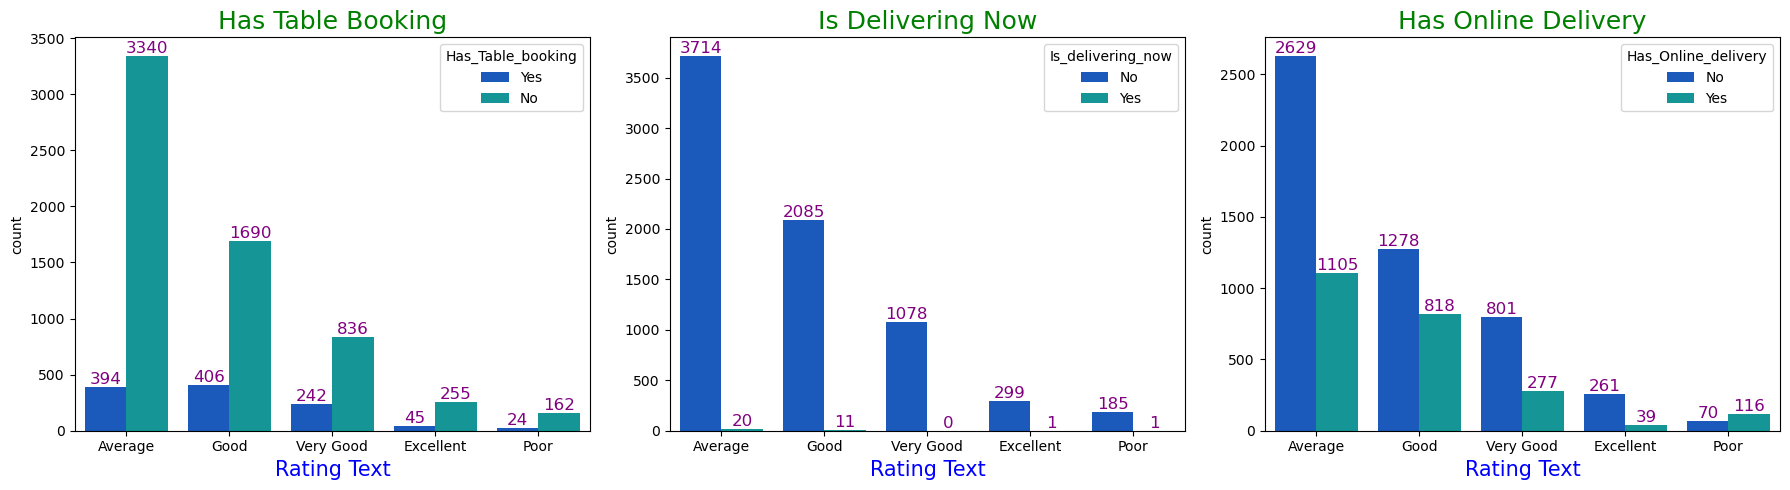

In [79]:
plt.figure(figsize=(8,3))
fig,axes = plt.subplots(1,3)
fig.set_size_inches(18,5)

ax=sns.countplot(x=df_rated['Rating_text'],data=df_rated,order=df_rated['Rating_text'].value_counts().index,hue='Has_Table_booking',palette='winter',ax=axes[0])
for bars in ax.containers:
        ax.bar_label(bars,color='purple',fontsize=12,fontweight=30)
ax.set_title("Has Table Booking",color='green',fontsize=18)
ax.set_xlabel("Rating Text",color='blue',fontsize=15)

ax1=sns.countplot(x=df_rated['Rating_text'],data=df_rated,order=df_rated['Rating_text'].value_counts().index,hue='Is_delivering_now',palette='winter',ax=axes[1])
for bars in ax1.containers:
        ax1.bar_label(bars,color='purple',fontsize=12,fontweight=30)
ax1.set_title("Is Delivering Now",color='green',fontsize=18)
ax1.set_xlabel("Rating Text",color='blue',fontsize=15)

ax2=sns.countplot(x=df_rated['Rating_text'],data=df_rated,order=df_rated['Rating_text'].value_counts().index,hue='Has_Online_delivery',palette='winter',ax=axes[2])
for bars in ax2.containers:
        ax2.bar_label(bars,color='purple',fontsize=12,fontweight=30)
ax2.set_title("Has Online Delivery",color='green',fontsize=18)
ax2.set_xlabel("Rating Text",color='blue',fontsize=15)

fig.tight_layout()
plt.show()

* Column Is_Delivering_Now doesn't seem an important feature as most of its value is No.
* So I choose to drop this feature.

In [80]:
## Which Cities have online deliveries option

df_rated[df_rated['Has_Online_delivery'] =="Yes"].City.value_counts()

City
New Delhi       1436
Gurgaon          412
Noida            335
Faridabad         34
Chennai           13
Abu Dhabi         11
Sharjah           11
Ahmedabad         11
Ghaziabad         10
Nagpur            10
Jaipur            10
Kolkata            8
Pune               7
Mumbai             7
Hyderabad          7
Coimbatore         7
Bangalore          7
Dubai              6
Chandigarh         6
Kochi              5
Mohali             1
Secunderabad       1
Name: count, dtype: int64

In [81]:
df_rated.drop(['Is_delivering_now'],axis=1,inplace=True)
df_rated.shape

C:\Users\USER\AppData\Local\Temp\ipykernel_8856\2721360895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rated.drop(['Is_delivering_now'],axis=1,inplace=True)


(7394, 19)

In [82]:
df_rated.head(1)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent,314


### Let's drop the features that are not important for Model Building

In [83]:
df_new = df_rated.drop(columns=['Restaurant_ID','Restaurant_Name','Country_Code','City','Address','Locality','Locality_Verbose',
                               'Longitude','Latitude','Currency','Cuisines','Rating_color','Rating_text'],axis=1)

In [84]:
df_new.head()

,Average_Cost_for_two,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Votes
0,1100,Yes,No,3,4.8,314
1,1200,Yes,No,3,4.5,591
2,4000,Yes,No,4,4.4,270
3,1500,No,No,4,4.9,365
4,1500,Yes,No,4,4.8,229


In [85]:
df_new.columns

Index(['Average_Cost_for_two', 'Has_Table_booking', 'Has_Online_delivery',
       'Price_range', 'Aggregate_rating', 'Votes'],
      dtype='object')

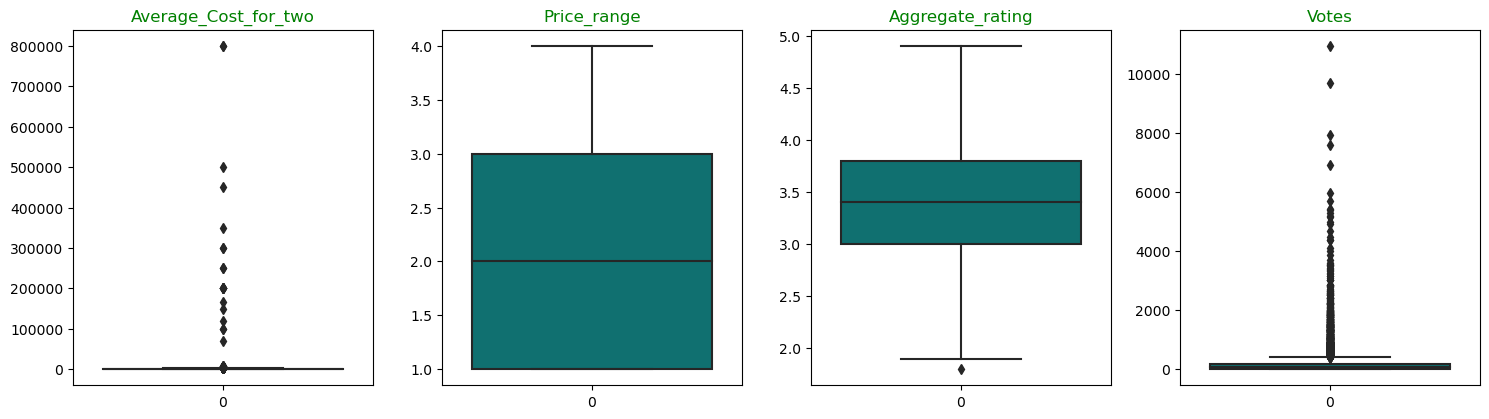

In [86]:
cols = ['Average_Cost_for_two','Price_range', 'Aggregate_rating', 'Votes']
fig=plt.figure(figsize=(15,8))
#plt.suptitle('Boxplot Post Outlier Treatment', fontsize = 25,color='blue')
for i in range(0,len(cols)):
    plt.subplot(2,4,i+1)
    #sns.boxplot(churn_df[cols[i]],color='orange')
    sns.boxplot(df_new[cols[i]],color='teal')
    plt.title(cols[i],color='green')
    #plt.title(cols[i],color='green')
fig.tight_layout()
plt.show()

In [87]:
df_new[df_new['Aggregate_rating'] < 2.0]

,Average_Cost_for_two,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Votes
1138,1000,Yes,Yes,3,1.8,322
4224,250,No,No,1,1.9,66
7507,500,No,Yes,2,1.9,146


In [88]:
df_new['Average_Cost_for_two'].describe(percentiles=[.25, .50, .75, .99])

count      7394.000000
mean       1450.157831
std       18314.593716
min           0.000000
25%         300.000000
50%         500.000000
75%         800.000000
99%        4000.000000
max      800000.000000
Name: Average_Cost_for_two, dtype: float64

In [89]:
df_new['Votes'].describe(percentiles=[.25, .50, .75, .99])

count     7394.000000
mean       202.062483
std        479.305610
min          4.000000
25%         19.000000
50%         60.000000
75%        181.000000
99%       2185.420000
max      10934.000000
Name: Votes, dtype: float64

In [90]:
# Define a function which returns the Upper and Lower limit to detect outliers for each feature.
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [91]:
# Cap & floor the values beyond the outlier boundaries
Outlier_col = ['Average_Cost_for_two','Votes']
for i in Outlier_col:
    LL,UL = remove_outlier(df_new[i])
    df_new[i] = np.where(df_new[i] > UL,UL,df_new[i])
    df_new[i] = np.where(df_new[i] < LL,LL,df_new[i])

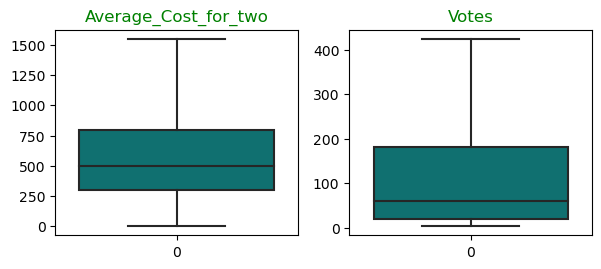

In [92]:
Outlier_col = ['Average_Cost_for_two','Votes']
fig=plt.figure(figsize=(12,5))
#plt.suptitle('Boxplot Post Outlier Treatment', fontsize = 25,color='blue')
for i in range(0,len(Outlier_col)):
    plt.subplot(2,4,i+1)
    #sns.boxplot(churn_df[cols[i]],color='orange')
    sns.boxplot(df_new[Outlier_col[i]],color='teal')
    plt.title(Outlier_col[i],color='green')
    #plt.title(cols[i],color='green')
fig.tight_layout()
plt.show()

In [93]:
df_new['Average_Cost_for_two'].describe()

count    7394.000000
mean      593.164322
std       436.213132
min         0.000000
25%       300.000000
50%       500.000000
75%       800.000000
max      1550.000000
Name: Average_Cost_for_two, dtype: float64

In [94]:
df_new['Votes'].describe()

count    7394.000000
mean      124.417636
std       140.290982
min         4.000000
25%        19.000000
50%        60.000000
75%       181.000000
max       424.000000
Name: Votes, dtype: float64

### Label Encoding

In [95]:
df_new = pd.get_dummies(columns=['Has_Table_booking','Has_Online_delivery'],data=df_new,drop_first=True)
df_new.head()

,Average_Cost_for_two,Price_range,Aggregate_rating,Votes,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,1100.0,3,4.8,314.0,True,False
1,1200.0,3,4.5,424.0,True,False
2,1550.0,4,4.4,270.0,True,False
3,1500.0,4,4.9,365.0,False,False
4,1500.0,4,4.8,229.0,True,False


In [96]:
df_new[['Has_Table_booking_Yes','Has_Online_delivery_Yes']] = df_new[['Has_Table_booking_Yes','Has_Online_delivery_Yes']].replace({True:1,False:0})

In [97]:
df_new.head()

,Average_Cost_for_two,Price_range,Aggregate_rating,Votes,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,1100.0,3,4.8,314.0,1,0
1,1200.0,3,4.5,424.0,1,0
2,1550.0,4,4.4,270.0,1,0
3,1500.0,4,4.9,365.0,0,0
4,1500.0,4,4.8,229.0,1,0


In [98]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7394 entries, 0 to 9550
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Average_Cost_for_two     7394 non-null   float64
 1   Price_range              7394 non-null   int64  
 2   Aggregate_rating         7394 non-null   float64
 3   Votes                    7394 non-null   float64
 4   Has_Table_booking_Yes    7394 non-null   int64  
 5   Has_Online_delivery_Yes  7394 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 662.4 KB


### Train - Test Split

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X = df_new.drop(['Aggregate_rating'], axis=1)
y = df_new['Aggregate_rating']

In [101]:
X.head(1)

,Average_Cost_for_two,Price_range,Votes,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,1100.0,3,314.0,1,0


In [102]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [103]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (5175, 5)
Shape of X_test :  (2219, 5)
Shape of y_train :  (5175,)
Shape of y_test :  (2219,)


### Feature Scaling

In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
scalor = MinMaxScaler()

In [106]:
X_train_scaled = pd.DataFrame(scalor.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scalor.transform(X_test), columns=X_test.columns)

In [107]:
print("Shape of X_train Scaled : ",X_train_scaled.shape)
print("Shape of X_test Scaled : ",X_test_scaled.shape)
print("Shape of y_train Scaled: ",y_train.shape)
print("Shape of y_test Scaled : ",y_test.shape)

Shape of X_train Scaled :  (5175, 5)
Shape of X_test Scaled :  (2219, 5)
Shape of y_train Scaled:  (5175,)
Shape of y_test Scaled :  (2219,)


In [108]:
X_train_scaled

,Average_Cost_for_two,Price_range,Votes,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,0.645161,0.666667,0.607143,1.0,1.0
1,0.903226,0.666667,1.000000,0.0,1.0
2,0.193548,0.000000,0.219048,0.0,0.0
3,0.967742,1.000000,0.973810,0.0,0.0
4,0.006452,0.000000,0.442857,0.0,0.0
...,...,...,...,...,...
5170,0.129032,0.000000,0.007143,0.0,0.0
5171,0.838710,0.666667,1.000000,1.0,1.0
5172,0.129032,0.000000,0.111905,0.0,0.0
5173,0.025806,0.666667,0.895238,0.0,0.0


In [109]:
X_test_scaled

,Average_Cost_for_two,Price_range,Votes,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,0.193548,0.000000,0.145238,0.0,1.0
1,0.016129,0.333333,1.000000,0.0,0.0
2,0.580645,0.333333,0.135714,1.0,1.0
3,0.645161,0.666667,0.569048,0.0,0.0
4,0.774194,0.666667,0.247619,1.0,1.0
...,...,...,...,...,...
2214,0.258065,0.000000,0.190476,0.0,0.0
2215,0.025806,0.333333,0.238095,0.0,0.0
2216,0.451613,0.333333,0.092857,0.0,1.0
2217,0.096774,0.000000,0.116667,0.0,0.0


## Model Building

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [111]:
def performance_metric(actual, prediction):
    MAE = mean_absolute_error(actual, prediction)
    MSE = mean_squared_error(actual, prediction)
    RMSE = np.sqrt(mean_squared_error(actual, prediction))
    R2_Score = r2_score(actual, prediction)  # R Square
    Adj_R2 = (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))
    metric_dict = {"MAE": round(MAE,4),
                  "MSE": round(MSE,4),
                  "RMSE": round(RMSE,4),
                  "R2_Score": round(R2_Score ,4),
                  "Adj_R2": round(Adj_R2,4)}
    print(f"Mean Absolute Error :{ MAE:.2f}")
    print(f"Mean Squared Error :{ MSE:.2f}")
    print(f"Root Mean Squared Error :{ RMSE:.2f}")
    print(f"R2 Score :{ R2_Score:.2f}")
    print(f"Adj_R2 :{Adj_R2:.2f}")
    return metric_dict
    
#    return print(f"MAE : {MAE :.4f} \nMSE : {MSE:.4f} \nRMSE : {RMSE:.4f} \nScore : {r2_score:.4f}")

In [112]:
#display adjusted R-squared
# print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

In [113]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [114]:
yPred_train = lr.predict(X_train_scaled)
yPred_test = lr.predict(X_test_scaled)

In [115]:
performance_metric(y_test, yPred_test)

Mean Absolute Error :0.31
Mean Squared Error :0.17
Root Mean Squared Error :0.41
R2 Score :0.44
Adj_R2 :0.43


{'MAE': 0.3111,
 'MSE': 0.167,
 'RMSE': 0.4087,
 'R2_Score': 0.4359,
 'Adj_R2': 0.4346}

### Comparison Table

In [116]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['Linear Regression'])
resultsDf

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.16703,0.408693,0.435872,0.434597


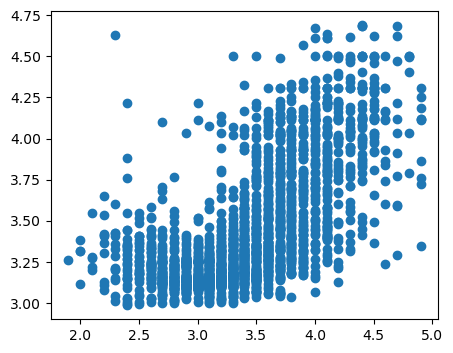

In [117]:
plt.figure(figsize=(5,4))
plt.scatter(y_test,yPred_test)

In [118]:
## plot Training data plot best fit line
# plt.scatter(X_train_scaled,y_train)
# plt.plot(X_train_scaled,lr.predict(X_train_scaled))

In [119]:
print(X_train_scaled.shape)
print(y_train.shape)

(5175, 5)
(5175,)


In [120]:
# plt.scatter(X_train_scaled, y_train, color = 'red')
# plt.plot(X_train_scaled, lr.predict(X_train_scaled), color = 'blue')
# plt.title('Truth or Bluff (Linear Regression)')
#plt.xlabel('Position Level')
#plt.ylabel('Salary')
plt.show()

### Ridge Regression

In [121]:
from sklearn.linear_model import Ridge

In [122]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)

Ridge()

In [123]:
yPred_train = ridge.predict(X_train_scaled)
yPred_test = ridge.predict(X_test_scaled)

In [124]:
performance_metric(y_test, yPred_test)

Mean Absolute Error :0.31
Mean Squared Error :0.17
Root Mean Squared Error :0.41
R2 Score :0.44
Adj_R2 :0.43


{'MAE': 0.3111,
 'MSE': 0.167,
 'RMSE': 0.4087,
 'R2_Score': 0.4359,
 'Adj_R2': 0.4347}

In [125]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['Ridge Regression'])
comp_table = pd.concat([resultsDf,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667


### Cross Validation Ridge¶

In [126]:
from sklearn.linear_model import RidgeCV

ridgecv=RidgeCV(cv=10)
ridgecv.fit(X_train_scaled,y_train)

RidgeCV(cv=10)

In [127]:
yPred_train = ridgecv.predict(X_train_scaled)
yPred_test = ridgecv.predict(X_test_scaled)

In [128]:
performance_metric(y_test, yPred_test)

Mean Absolute Error :0.31
Mean Squared Error :0.17
Root Mean Squared Error :0.41
R2 Score :0.44
Adj_R2 :0.43


{'MAE': 0.3111,
 'MSE': 0.167,
 'RMSE': 0.4087,
 'R2_Score': 0.4359,
 'Adj_R2': 0.4347}

In [129]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['Ridge Regression Cross Validation'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667


### Lasso Regression

In [130]:
from sklearn.linear_model import Lasso

In [131]:
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)

Lasso()

In [132]:
yPred_train = lasso.predict(X_train_scaled)
yPred_test = lasso.predict(X_test_scaled)

In [133]:
performance_metric(y_test, yPred_test)

Mean Absolute Error :0.44
Mean Squared Error :0.30
Root Mean Squared Error :0.54
R2 Score :-0.00
Adj_R2 :-0.00


{'MAE': 0.4426,
 'MSE': 0.2965,
 'RMSE': 0.5445,
 'R2_Score': -0.0015,
 'Adj_R2': -0.0037}

In [134]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['Lasso Regression'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729


### Cross Validation Lasso

In [135]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [136]:
yPred_train = lassocv.predict(X_train_scaled)
yPred_test = lassocv.predict(X_test_scaled)

In [137]:
performance_metric(y_test, yPred_test)

Mean Absolute Error :0.31
Mean Squared Error :0.17
Root Mean Squared Error :0.41
R2 Score :0.44
Adj_R2 :0.43


{'MAE': 0.311,
 'MSE': 0.167,
 'RMSE': 0.4087,
 'R2_Score': 0.436,
 'Adj_R2': 0.4347}

In [138]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['Lasso Regression Cross Validation'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729
Lasso Regression Cross Validation,0.311029,0.167006,0.408664,0.435951,0.434677


### Support Vector Regression

In [139]:
from sklearn.svm import SVR

In [140]:
svr = SVR(kernel = 'rbf',)
svr.fit(X_train_scaled,y_train)

SVR()

In [141]:
yPred_train = svr.predict(X_train_scaled)
yPred_test = svr.predict(X_test_scaled)

In [142]:
performance_metric(y_test, yPred_test)

Mean Absolute Error :0.28
Mean Squared Error :0.15
Root Mean Squared Error :0.39
R2 Score :0.49
Adj_R2 :0.49


{'MAE': 0.2825,
 'MSE': 0.152,
 'RMSE': 0.3898,
 'R2_Score': 0.4868,
 'Adj_R2': 0.4856}

In [143]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['Support Vector Regression'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729
Lasso Regression Cross Validation,0.311029,0.167006,0.408664,0.435951,0.434677
Support Vector Regression,0.282470,0.151965,0.389827,0.486750,0.485590


### Applying GridSearchCV on SVR

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
param_grids={ "C":[0.1,0.5],"kernel":["rbf","poly"],"degree":[2,3]}

In [146]:
param_grid = {
               'kernel': ['linear','rbf','poly'],
               'C': [0.01,0.1,1,10],
               'gamma': [0.01,0.1,0.2],
               'degree': [2,3],
    
             }

In [147]:
svr = SVR()
gridsearchSvr = GridSearchCV(svr,param_grid=param_grid)
gridsearchSvr.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3],
                         'gamma': [0.01, 0.1, 0.2],
                         'kernel': ['linear', 'rbf', 'poly']})

In [148]:
# getting best parameters used out of all the combinations given in grid search
print(gridsearchSvr.best_params_)
print(gridsearchSvr.best_estimator_)

{'C': 10, 'degree': 2, 'gamma': 0.2, 'kernel': 'rbf'}
SVR(C=10, degree=2, gamma=0.2)


In [149]:
best_model_svr = gridsearchSvr.best_estimator_
best_model_svr.fit(X_train_scaled,y_train)

SVR(C=10, degree=2, gamma=0.2)

In [150]:
yPred_train = best_model_svr.predict(X_train_scaled)
yPred_test = best_model_svr.predict(X_test_scaled)

In [151]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.29
Mean Squared Error :0.15
Root Mean Squared Error :0.39
R2 Score :0.48
Adj_R2 :0.48


{'MAE': 0.2857,
 'MSE': 0.1531,
 'RMSE': 0.3913,
 'R2_Score': 0.4829,
 'Adj_R2': 0.4818}

In [152]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['Support Vector Regression Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729
Lasso Regression Cross Validation,0.311029,0.167006,0.408664,0.435951,0.434677
Support Vector Regression,0.282470,0.151965,0.389827,0.486750,0.485590
Support Vector Regression Tuned,0.285663,0.153096,0.391275,0.482933,0.481764


## K-nearest Neighbour (KNN Model)

In [153]:
from sklearn.neighbors import KNeighborsRegressor

In [154]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [155]:
yPred_train = knn.predict(X_train_scaled)
yPred_test = knn.predict(X_test_scaled)

In [156]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.30
Mean Squared Error :0.17
Root Mean Squared Error :0.41
R2 Score :0.44
Adj_R2 :0.44


{'MAE': 0.2992,
 'MSE': 0.1661,
 'RMSE': 0.4075,
 'R2_Score': 0.439,
 'Adj_R2': 0.4378}

In [157]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['KNN'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729
Lasso Regression Cross Validation,0.311029,0.167006,0.408664,0.435951,0.434677
Support Vector Regression,0.282470,0.151965,0.389827,0.486750,0.485590
Support Vector Regression Tuned,0.285663,0.153096,0.391275,0.482933,0.481764
KNN,0.299171,0.166092,0.407544,0.439038,0.437770


### KNN Tuned

In [158]:
param_grid={"n_neighbors":[9,10,11,12,13,14,15,16]}
knngridsearch=GridSearchCV(knn,param_grid=param_grid)

In [159]:
knngridsearch.fit(X_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [9, 10, 11, 12, 13, 14, 15, 16]})

In [160]:
# getting best parameters used out of all the combinations given in grid search

print(knngridsearch.best_params_)
print(knngridsearch.best_estimator_)

{'n_neighbors': 16}
KNeighborsRegressor(n_neighbors=16)


In [161]:
best_model_knn = knngridsearch.best_estimator_
best_model_knn.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=16)

In [162]:
yPred_train = best_model_knn.predict(X_train_scaled)
yPred_test = best_model_knn.predict(X_test_scaled)

In [163]:
# yPred_train = knngridsearch.predict(X_train_scaled)
# yPred_test = knngridsearch.predict(X_test_scaled)

In [164]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.29
Mean Squared Error :0.15
Root Mean Squared Error :0.39
R2 Score :0.49
Adj_R2 :0.49


{'MAE': 0.286,
 'MSE': 0.1511,
 'RMSE': 0.3887,
 'R2_Score': 0.4898,
 'Adj_R2': 0.4887}

In [165]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['KNN Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729
Lasso Regression Cross Validation,0.311029,0.167006,0.408664,0.435951,0.434677
Support Vector Regression,0.282470,0.151965,0.389827,0.486750,0.485590
Support Vector Regression Tuned,0.285663,0.153096,0.391275,0.482933,0.481764
KNN,0.299171,0.166092,0.407544,0.439038,0.437770
KNN Tuned,0.286033,0.151060,0.388665,0.489807,0.488654


### Decission Tree

In [166]:
from sklearn.tree import DecisionTreeRegressor

In [167]:
dt = DecisionTreeRegressor(random_state=4)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=4)

In [168]:
yPred_train = dt.predict(X_train)
yPred_test = dt.predict(X_test)

In [169]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.37
Mean Squared Error :0.26
Root Mean Squared Error :0.51
R2 Score :0.13
Adj_R2 :0.13


{'MAE': 0.3663,
 'MSE': 0.2576,
 'RMSE': 0.5076,
 'R2_Score': 0.1299,
 'Adj_R2': 0.1279}

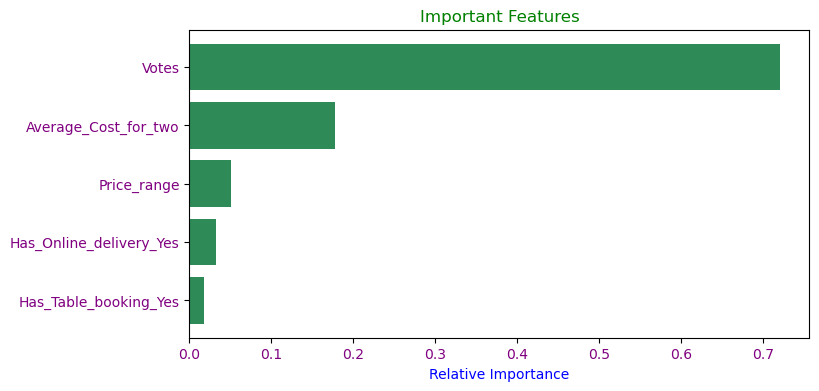

In [170]:
imp = dt.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))

plt.barh(range(len(indices)), imp[indices], color="seagreen", align="center")
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

In [171]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['Decission Tree Regressor'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729
Lasso Regression Cross Validation,0.311029,0.167006,0.408664,0.435951,0.434677
Support Vector Regression,0.282470,0.151965,0.389827,0.486750,0.485590
Support Vector Regression Tuned,0.285663,0.153096,0.391275,0.482933,0.481764
KNN,0.299171,0.166092,0.407544,0.439038,0.437770
KNN Tuned,0.286033,0.151060,0.388665,0.489807,0.488654
Decission Tree Regressor,0.366341,0.257634,0.507577,0.129862,0.127896


### Applying GridSearchCV on Decision Tree Regressor

In [172]:
grid = {'criterion':["friedman_mse", "squared_error", "absolute_error"],
        'max_depth':[10,20,30],
        'min_samples_split':[2,3,5,7],
        'min_samples_leaf':[2,3,4,5],
        'min_impurity_decrease':[0.001,0.0001],
        }

In [173]:
grid_search = GridSearchCV(estimator = dt, param_grid = grid, cv = 10,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=4),
             param_grid={'criterion': ['friedman_mse', 'squared_error',
                                       'absolute_error'],
                         'max_depth': [10, 20, 30],
                         'min_impurity_decrease': [0.001, 0.0001],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 5, 7]},
             verbose=1)

In [174]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'criterion': 'squared_error', 'max_depth': 10, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 5, 'min_samples_split': 2} 

DecisionTreeRegressor(max_depth=10, min_impurity_decrease=0.0001,
                      min_samples_leaf=5, random_state=4)


**Building model on best parameters**

In [175]:
best_model_dt = grid_search.best_estimator_
best_model_dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_impurity_decrease=0.0001,
                      min_samples_leaf=5, random_state=4)

In [176]:
yPred_train = best_model_dt.predict(X_train)
yPred_test = best_model_dt.predict(X_test)

In [177]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.29
Mean Squared Error :0.16
Root Mean Squared Error :0.40
R2 Score :0.45
Adj_R2 :0.45


{'MAE': 0.2937,
 'MSE': 0.163,
 'RMSE': 0.4037,
 'R2_Score': 0.4496,
 'Adj_R2': 0.4484}

In [178]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['Decission Tree Regressor Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729
Lasso Regression Cross Validation,0.311029,0.167006,0.408664,0.435951,0.434677
Support Vector Regression,0.282470,0.151965,0.389827,0.486750,0.485590
Support Vector Regression Tuned,0.285663,0.153096,0.391275,0.482933,0.481764
KNN,0.299171,0.166092,0.407544,0.439038,0.437770
KNN Tuned,0.286033,0.151060,0.388665,0.489807,0.488654
Decission Tree Regressor,0.366341,0.257634,0.507577,0.129862,0.127896


### Random Forest Regressor

In [179]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
rf = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = 5, random_state=4)
rf.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', random_state=4)

In [181]:
yPred_train = rf.predict(X_train_scaled)
yPred_test = rf.predict(X_test_scaled)

In [182]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.29
Mean Squared Error :0.15
Root Mean Squared Error :0.39
R2 Score :0.50
Adj_R2 :0.50


{'MAE': 0.2853,
 'MSE': 0.149,
 'RMSE': 0.386,
 'R2_Score': 0.4967,
 'Adj_R2': 0.4955}

In [183]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['Random Forest Regressor'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729
Lasso Regression Cross Validation,0.311029,0.167006,0.408664,0.435951,0.434677
Support Vector Regression,0.282470,0.151965,0.389827,0.486750,0.485590
Support Vector Regression Tuned,0.285663,0.153096,0.391275,0.482933,0.481764
KNN,0.299171,0.166092,0.407544,0.439038,0.437770
KNN Tuned,0.286033,0.151060,0.388665,0.489807,0.488654
Decission Tree Regressor,0.366341,0.257634,0.507577,0.129862,0.127896


### Random Forest Regressor Tuned

In [186]:
grid = { 'n_estimators': [200,300],
         'criterion': ['squared_error', 'absolute_error'],
         'max_features': ['sqrt','log2'],
         'max_depth' : [3,4,5,6,7]
       }
         

In [188]:
gridsearchRF = GridSearchCV(estimator=rf, param_grid=grid, cv= 5)
gridsearchRF.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, max_features='sqrt',
                                             random_state=4),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [189]:
print(gridsearchRF.best_params_,"\n")
print(gridsearchRF.best_estimator_)

{'criterion': 'squared_error', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200} 

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=200,
                      random_state=4)


In [190]:
best_model_rf = gridsearchRF.best_estimator_
best_model_rf.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=200,
                      random_state=4)

In [191]:
yPred_train = best_model_rf.predict(X_train_scaled)
yPred_test = best_model_rf.predict(X_test_scaled)

In [192]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.28
Mean Squared Error :0.14
Root Mean Squared Error :0.38
R2 Score :0.51
Adj_R2 :0.51


{'MAE': 0.2773,
 'MSE': 0.1438,
 'RMSE': 0.3792,
 'R2_Score': 0.5142,
 'Adj_R2': 0.5131}

In [193]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['Random Forest Regressor Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729
Lasso Regression Cross Validation,0.311029,0.167006,0.408664,0.435951,0.434677
Support Vector Regression,0.282470,0.151965,0.389827,0.486750,0.485590
Support Vector Regression Tuned,0.285663,0.153096,0.391275,0.482933,0.481764
KNN,0.299171,0.166092,0.407544,0.439038,0.437770
KNN Tuned,0.286033,0.151060,0.388665,0.489807,0.488654
Decission Tree Regressor,0.366341,0.257634,0.507577,0.129862,0.127896


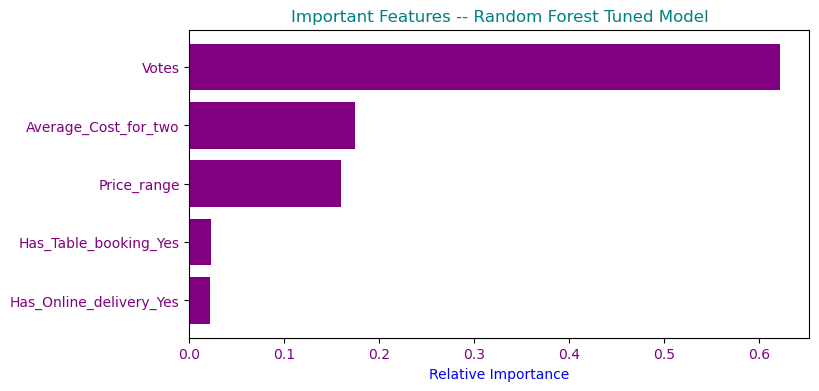

In [194]:
imp = best_model_rf.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train_scaled.columns)

plt.figure(figsize=(8,4))
plt.barh(range(len(indices)), imp[indices], color='purple')
plt.title("Important Features -- Random Forest Tuned Model",color='teal')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

### Ada Boost Regressor

In [195]:
from sklearn.ensemble import AdaBoostRegressor

In [196]:
dtr = DecisionTreeRegressor(max_depth=3)
adb = AdaBoostRegressor(base_estimator=dtr, n_estimators=50, learning_rate=0.1, loss='linear', random_state=42)
adb.fit(X_train_scaled, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.1, random_state=42)

In [197]:
yPred_train = adb.predict(X_train_scaled)
yPred_test = adb.predict(X_test_scaled)

In [198]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.30
Mean Squared Error :0.16
Root Mean Squared Error :0.40
R2 Score :0.47
Adj_R2 :0.47


{'MAE': 0.2981,
 'MSE': 0.158,
 'RMSE': 0.3974,
 'R2_Score': 0.4665,
 'Adj_R2': 0.4653}

In [199]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['Ada Boost Regressor'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729
Lasso Regression Cross Validation,0.311029,0.167006,0.408664,0.435951,0.434677
Support Vector Regression,0.282470,0.151965,0.389827,0.486750,0.485590
Support Vector Regression Tuned,0.285663,0.153096,0.391275,0.482933,0.481764
KNN,0.299171,0.166092,0.407544,0.439038,0.437770
KNN Tuned,0.286033,0.151060,0.388665,0.489807,0.488654
Decission Tree Regressor,0.366341,0.257634,0.507577,0.129862,0.127896


### Ada Boost Regressor Tuned

In [200]:
ada=AdaBoostRegressor()
param_grid={"n_estimators": [50,100,150,200,250],
                "learning_rate": [0.1,0.25,0.5,0.75,1],
                'loss':['linear', 'square', 'exponential']}
gridsearchAdb = GridSearchCV(estimator=ada,param_grid=param_grid)
gridsearchAdb.fit(X_train_scaled,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.25, 0.5, 0.75, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [201]:
print(gridsearchAdb.best_params_,"\n")
print(gridsearchAdb.best_estimator_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50} 

AdaBoostRegressor(learning_rate=0.1, loss='exponential')


In [202]:
best_model_adb = gridsearchAdb.best_estimator_
best_model_adb.fit(X_train_scaled,y_train)

AdaBoostRegressor(learning_rate=0.1, loss='exponential')

In [203]:
yPred_train = best_model_adb.predict(X_train_scaled)
yPred_test = best_model_adb.predict(X_test_scaled)

In [204]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.30
Mean Squared Error :0.16
Root Mean Squared Error :0.40
R2 Score :0.47
Adj_R2 :0.47


{'MAE': 0.2968,
 'MSE': 0.1576,
 'RMSE': 0.397,
 'R2_Score': 0.4678,
 'Adj_R2': 0.4666}

In [205]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['Ada Boost Regressor Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729
Lasso Regression Cross Validation,0.311029,0.167006,0.408664,0.435951,0.434677
Support Vector Regression,0.282470,0.151965,0.389827,0.486750,0.485590
Support Vector Regression Tuned,0.285663,0.153096,0.391275,0.482933,0.481764
KNN,0.299171,0.166092,0.407544,0.439038,0.437770
KNN Tuned,0.286033,0.151060,0.388665,0.489807,0.488654
Decission Tree Regressor,0.366341,0.257634,0.507577,0.129862,0.127896


### XGBoost

* Effective with large data sets. Tree algorithms such as XGBoost and Random Forest do not need normalized features and work     well if the data is nonlinear, non-monotonic, or with segregated clusters.

* It is an implementation of the gradient boosting machine learning algorithm, which is a type of ensemble learning method that combines the predictions of multiple weaker models to create a stronger, more accurate model.

* XGBoost works by building an ensemble of decision trees, where each tree is trained to make predictions based on a subset of the available data. The trees are grown sequentially, with each tree learning from the mistakes of the previous tree. The final prediction is made by taking the average of the predictions from all of the trees in the ensemble.

* One of the key advantages of XGBoost is its ability to handle missing data and large datasets efficiently. 

In [206]:
from xgboost import XGBRegressor

In [207]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [208]:
yPred_train = xgb.predict(X_train)
yPred_test = xgb.predict(X_test)

In [209]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.30
Mean Squared Error :0.17
Root Mean Squared Error :0.41
R2 Score :0.44
Adj_R2 :0.44


{'MAE': 0.299,
 'MSE': 0.1667,
 'RMSE': 0.4083,
 'R2_Score': 0.437,
 'Adj_R2': 0.4357}

In [210]:
# comp_table.drop(index='XGBoost Regressor',axis=0,inplace=True)

In [211]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['XGBoost Regressor'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729
Lasso Regression Cross Validation,0.311029,0.167006,0.408664,0.435951,0.434677
Support Vector Regression,0.282470,0.151965,0.389827,0.486750,0.485590
Support Vector Regression Tuned,0.285663,0.153096,0.391275,0.482933,0.481764
KNN,0.299171,0.166092,0.407544,0.439038,0.437770
KNN Tuned,0.286033,0.151060,0.388665,0.489807,0.488654
Decission Tree Regressor,0.366341,0.257634,0.507577,0.129862,0.127896


In [212]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearchxgb = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=5,
                           min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                           objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
                           param_grid = param_test1, scoring ='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearchxgb.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=140,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='neg_mean_absolute_error')

In [213]:
print(gsearchxgb.best_params_,"\n")
print(gsearchxgb.best_estimator_)

{'max_depth': 3, 'min_child_weight': 5} 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=140, n_jobs=None, nthread=4,
             num_parallel_tree=None, ...)


In [214]:
best_model_xgb = gsearchxgb.best_estimator_
best_model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=140, n_jobs=None, nthread=4,
             num_parallel_tree=None, ...)

In [215]:
yPred_train = best_model_xgb.predict(X_train)
yPred_test = best_model_xgb.predict(X_test)

In [216]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.28
Mean Squared Error :0.14
Root Mean Squared Error :0.38
R2 Score :0.51
Adj_R2 :0.51


{'MAE': 0.2781,
 'MSE': 0.1443,
 'RMSE': 0.3799,
 'R2_Score': 0.5127,
 'Adj_R2': 0.5116}

In [217]:
R2_Score = r2_score(y_test, yPred_test)  # R Square
resultsDf1 = pd.DataFrame({'MAE': mean_absolute_error(y_test,yPred_test),'MSE': mean_squared_error(y_test,yPred_test),
                          'RMSE': np.sqrt(mean_squared_error(y_test,yPred_test)),'R2 Score':r2_score(y_test,yPred_test),
                          'Adj R2': (1 - (1-R2_Score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))},
                           index=['XGBoost Regressor Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,MAE,MSE,RMSE,R2 Score,Adj R2
Linear Regression,0.311068,0.167030,0.408693,0.435872,0.434597
Ridge Regression,0.311059,0.167009,0.408668,0.435941,0.434667
Ridge Regression Cross Validation,0.311059,0.167009,0.408668,0.435941,0.434667
Lasso Regression,0.442554,0.296519,0.544535,-0.001466,-0.003729
Lasso Regression Cross Validation,0.311029,0.167006,0.408664,0.435951,0.434677
Support Vector Regression,0.282470,0.151965,0.389827,0.486750,0.485590
Support Vector Regression Tuned,0.285663,0.153096,0.391275,0.482933,0.481764
KNN,0.299171,0.166092,0.407544,0.439038,0.437770
KNN Tuned,0.286033,0.151060,0.388665,0.489807,0.488654
Decission Tree Regressor,0.366341,0.257634,0.507577,0.129862,0.127896


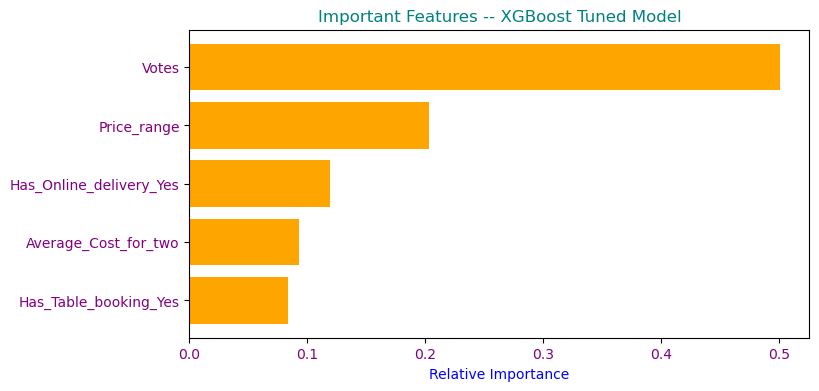

In [218]:
imp = best_model_xgb.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))
plt.barh(range(len(indices)), imp[indices], color='orange')
plt.title("Important Features -- XGBoost Tuned Model",color='teal')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

In [234]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearchxgb = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=5,
                           min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                           objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
                           param_grid = param_test2, scoring ='neg_mean_absolute_error',n_jobs=4, cv=5)
gsearchxgb.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=140,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [4, 5, 6]},
             scoring='neg_mean_absolute_error')

In [235]:
print(gsearchxgb.best_params_,"\n")
print(gsearchxgb.best_estimator_)

{'max_depth': 4, 'min_child_weight': 6} 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=140, n_jobs=None, nthread=4,
             num_parallel_tree=None, ...)


In [236]:
yPred_train = best_model_xgb.predict(X_train)
yPred_test = best_model_xgb.predict(X_test)

In [237]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.28
Mean Squared Error :0.14
Root Mean Squared Error :0.38
R2 Score :0.51
Adj_R2 :0.51


{'MAE': 0.2781,
 'MSE': 0.1443,
 'RMSE': 0.3799,
 'R2_Score': 0.5127,
 'Adj_R2': 0.5116}

### Elasticnet Regression

In [201]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)


ElasticNet()

In [205]:
yPred_train = elastic.predict(X_train_scaled)
yPred_test = elastic.predict(X_test_scaled)

In [206]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.44
Mean Squared Error :0.30
Root Mean Squared Error :0.54
R2 Score :-0.00
Adj_R2 :-0.00


{'MAE': 0.4426,
 'MSE': 0.2965,
 'RMSE': 0.5445,
 'R2_Score': -0.0015,
 'Adj_R2': -0.0037}

In [207]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)


ElasticNetCV(cv=5)

In [208]:
yPred_train = elasticcv.predict(X_train_scaled)
yPred_test = elasticcv.predict(X_test_scaled)

In [209]:
performance_metric(y_test,yPred_test)

Mean Absolute Error :0.31
Mean Squared Error :0.17
Root Mean Squared Error :0.41
R2 Score :0.44
Adj_R2 :0.43


{'MAE': 0.311,
 'MSE': 0.167,
 'RMSE': 0.4086,
 'R2_Score': 0.436,
 'Adj_R2': 0.4347}